In [10]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

In [11]:
metrics_dir = "/scratch/s194101/finetune_logs_all/"
run = "mmidb_noica_noica_5.0_2"

files = glob.glob(f"{metrics_dir + run}/version_*/metrics.csv")
files.sort(key=lambda x: int(re.search(r'\/version_(\d+)\/metrics\.csv', x).group(1)))
files

['/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_0/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_1/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_2/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_3/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_4/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_5/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_6/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_7/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_8/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_9/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/version_10/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_2/ver

In [12]:
data = pd.read_csv(files[0])
data_1 = pd.read_csv(files[1])

all_data = []

for file in files:
    data = pd.read_csv(file)
    all_data.append(data)


In [13]:
all_data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23553 entries, 0 to 23552
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fold_0_Repeat_0-acc        23529 non-null  float64
 1   Fold_0_Repeat_0-epoch      23553 non-null  int64  
 2   Fold_0_Repeat_0-loss       23529 non-null  float64
 3   Fold_0_Repeat_0-test_acc   1 non-null      float64
 4   Fold_0_Repeat_0-test_loss  1 non-null      float64
 5   Fold_0_Repeat_0-val_acc    23 non-null     float64
 6   Fold_0_Repeat_0-val_loss   23 non-null     float64
 7   step                       23553 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.4 MB


In [14]:
all_data[1]

,Fold_0_Repeat_0-acc,Fold_0_Repeat_0-epoch,Fold_0_Repeat_0-loss,Fold_0_Repeat_0-test_acc,Fold_0_Repeat_0-test_loss,Fold_0_Repeat_0-val_acc,Fold_0_Repeat_0-val_loss,step
0,0.4375,0,0.967177,NaN,NaN,NaN,NaN,0
1,0.5000,0,1.170287,NaN,NaN,NaN,NaN,1
2,0.6875,0,0.627799,NaN,NaN,NaN,NaN,2
3,0.3125,0,1.378281,NaN,NaN,NaN,NaN,3
4,0.3750,0,1.225210,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...
23548,1.0000,22,0.141612,NaN,NaN,NaN,NaN,23526
23549,0.9375,22,0.121307,NaN,NaN,NaN,NaN,23527
23550,0.8750,22,0.251545,NaN,NaN,NaN,NaN,23528
23551,NaN,22,NaN,NaN,NaN,0.711806,0.813429,23528


In [15]:
# all_data[2]["Fold_0_Repeat_0-test_acc"]
all_data[1][all_data[1]["Fold_0_Repeat_0-val_loss"].notna()]["Fold_0_Repeat_0-val_loss"]
# all_data[1]["step"]

1023     0.663340
2047     0.598809
3071     0.592160
4095     0.574977
5119     0.569863
6143     0.573959
7167     0.573966
8191     0.578417
9215     0.563950
10239    0.550059
11263    0.574209
12287    0.564570
13311    0.542773
14335    0.564750
15359    0.581687
16383    0.588261
17407    0.628178
18431    0.602044
19455    0.665957
20479    0.682209
21503    0.771328
22527    0.779051
23551    0.813429
Name: Fold_0_Repeat_0-val_loss, dtype: float64

In [20]:
all_data[1]["Fold_0_Repeat_0-epoch"]

0         0
1         0
2         0
3         0
4         0
         ..
23548    22
23549    22
23550    22
23551    22
23552    23
Name: Fold_0_Repeat_0-epoch, Length: 23553, dtype: int64

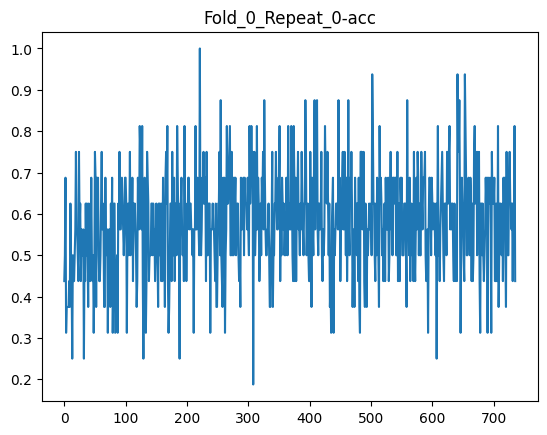

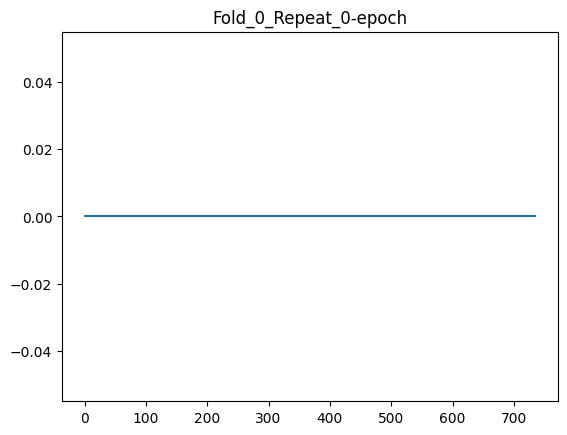

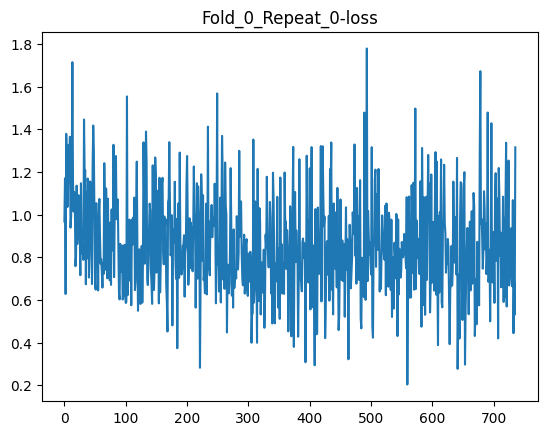

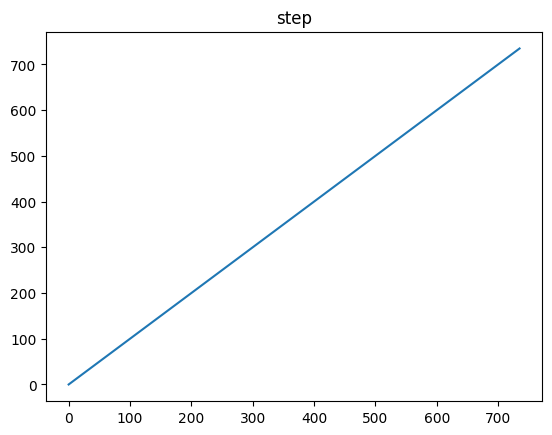

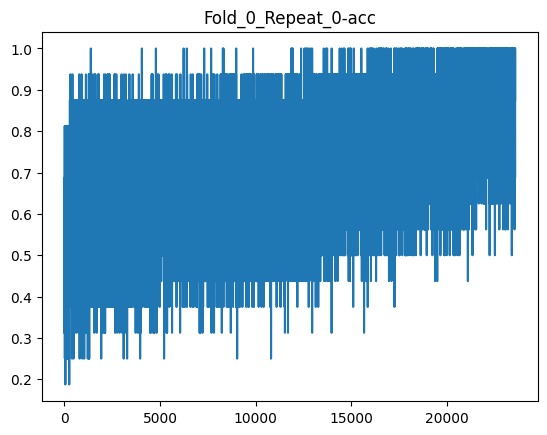

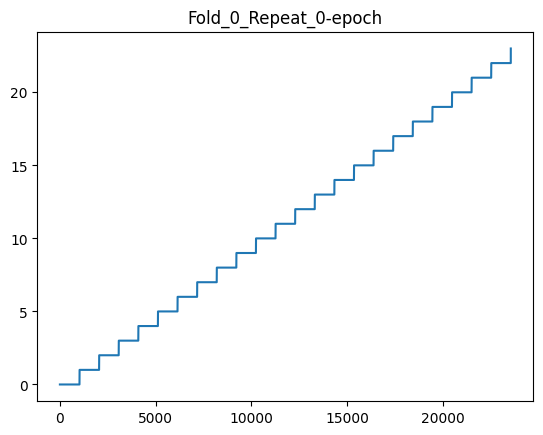

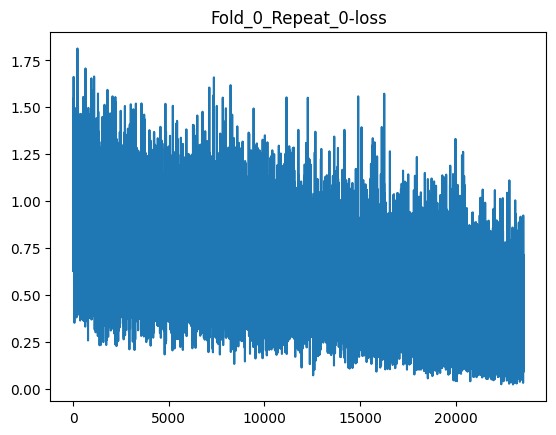

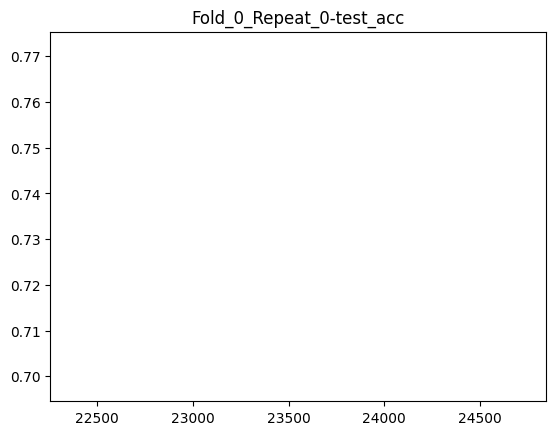

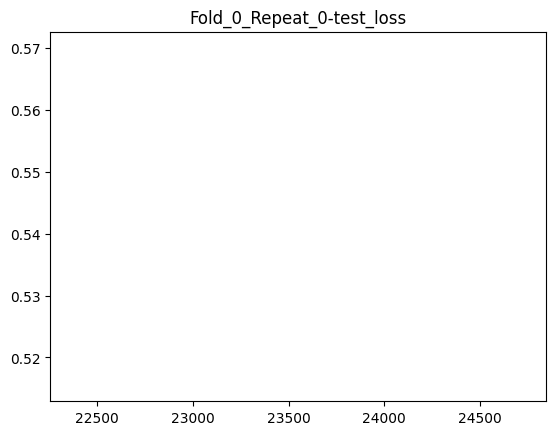

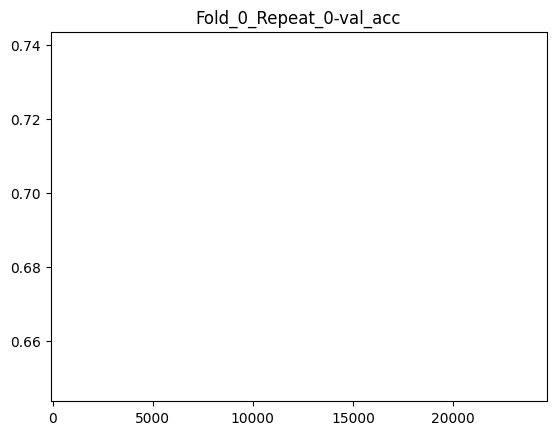

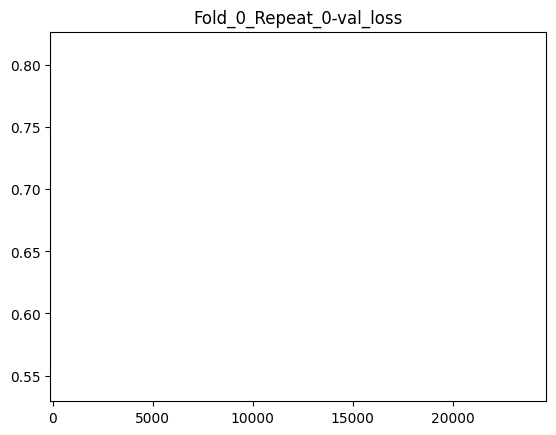

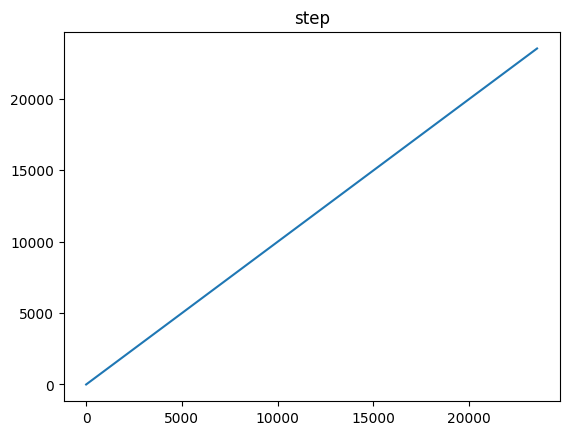

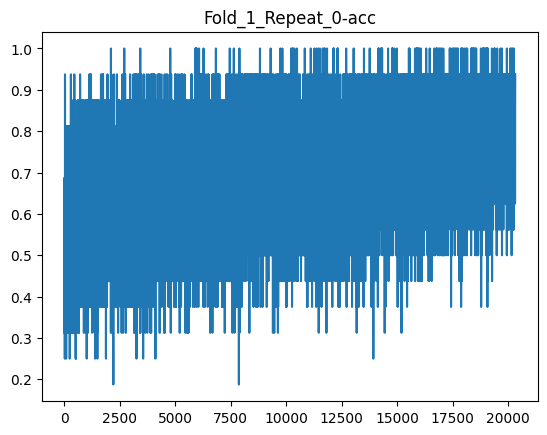

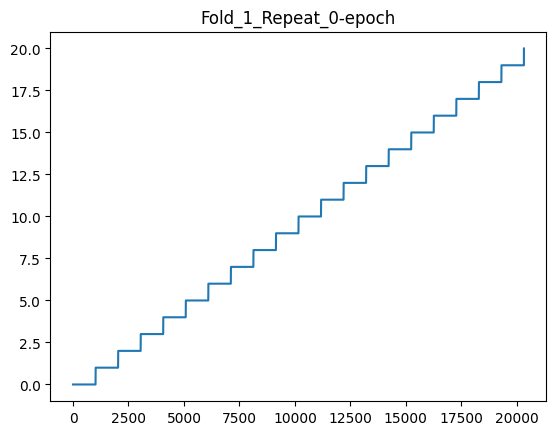

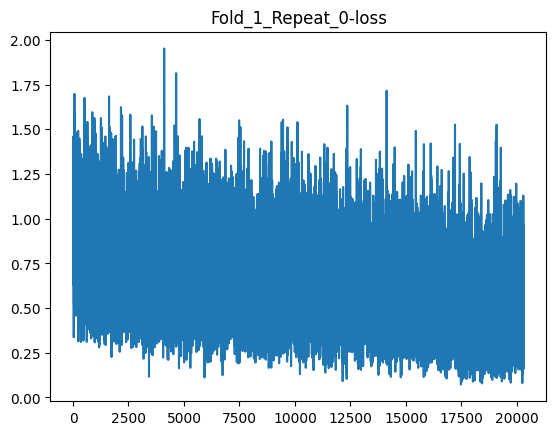

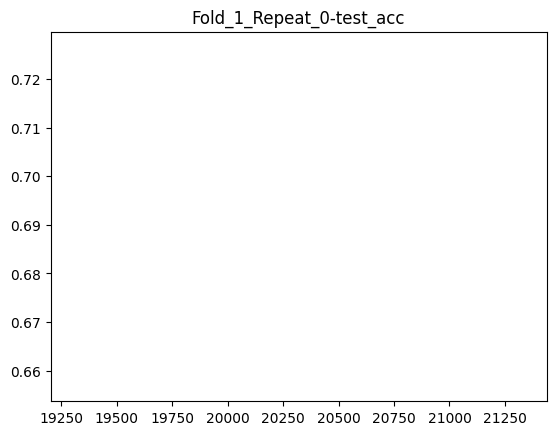

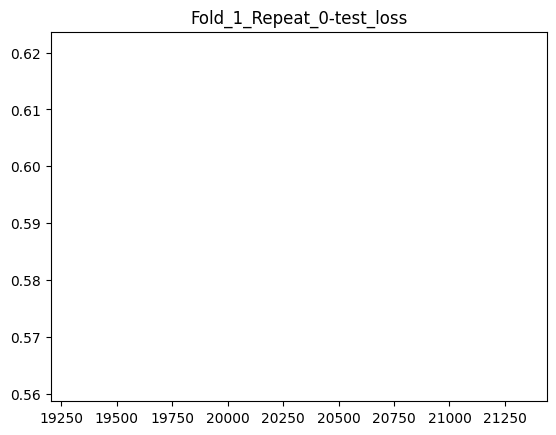

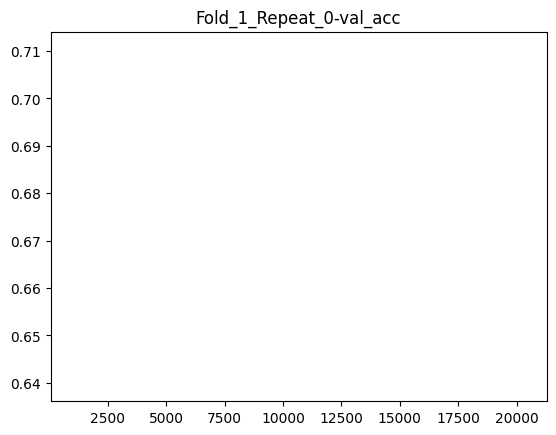

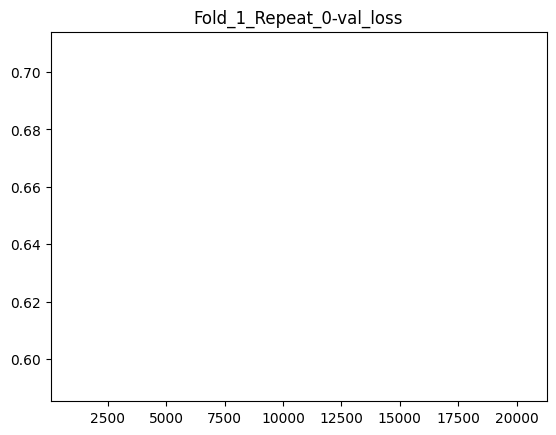

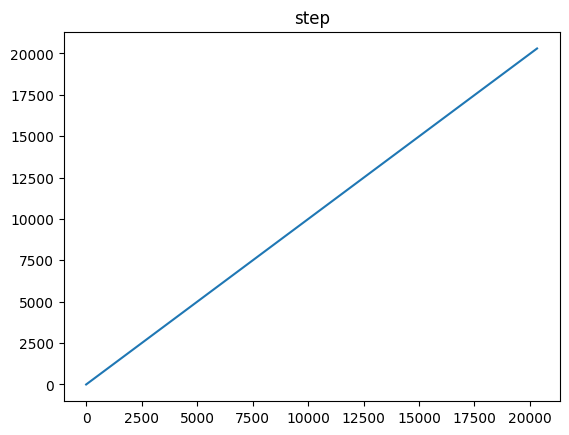

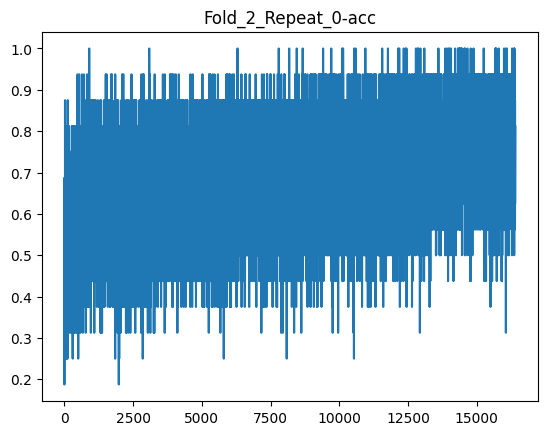

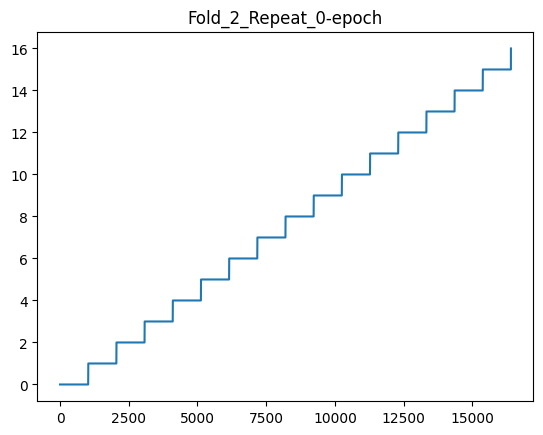

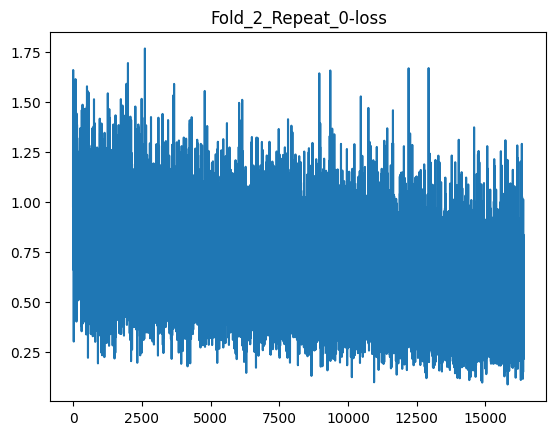

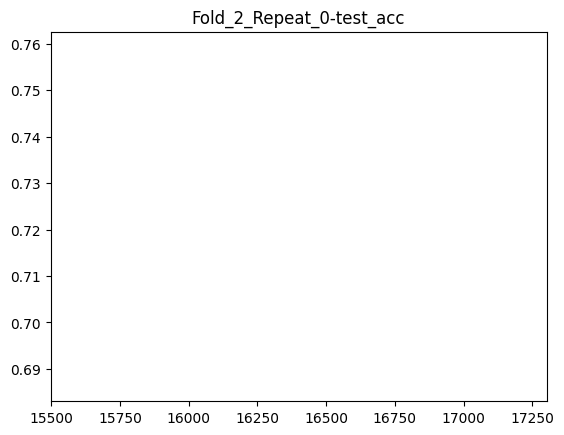

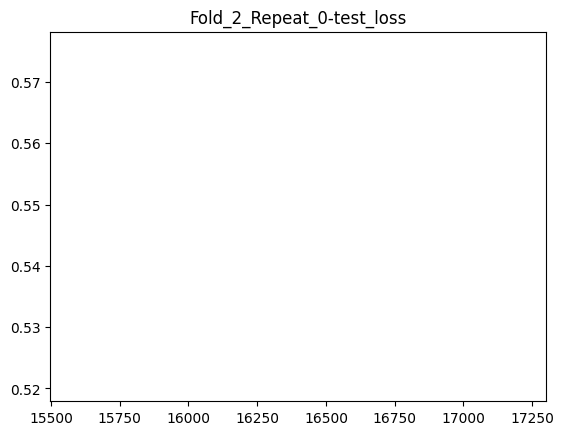

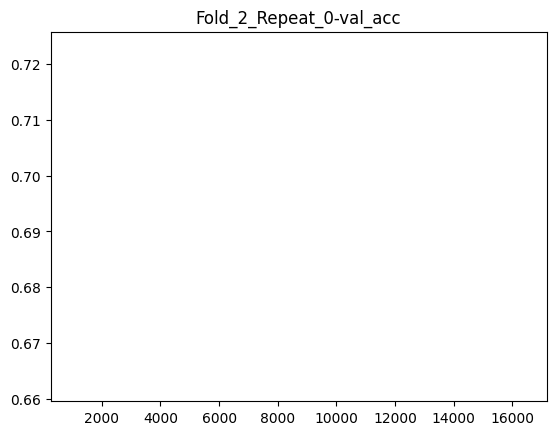

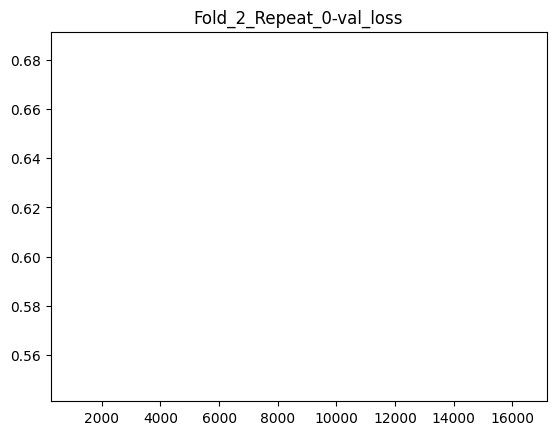

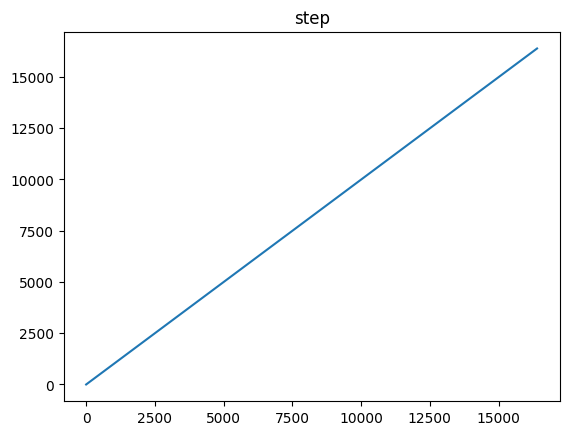

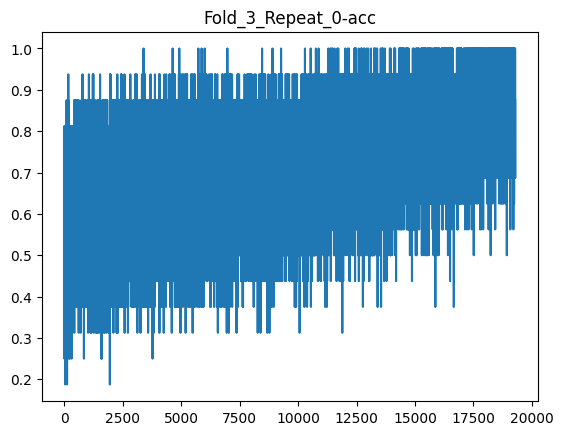

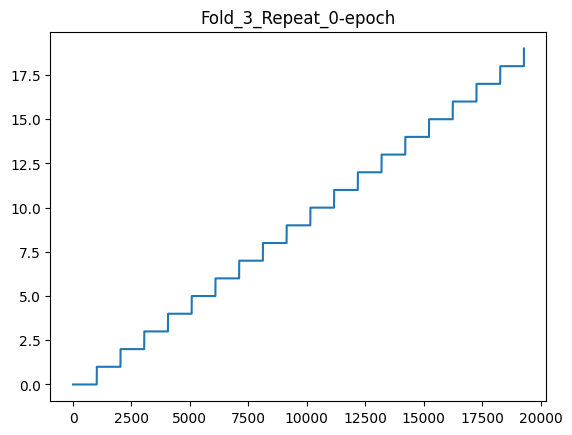

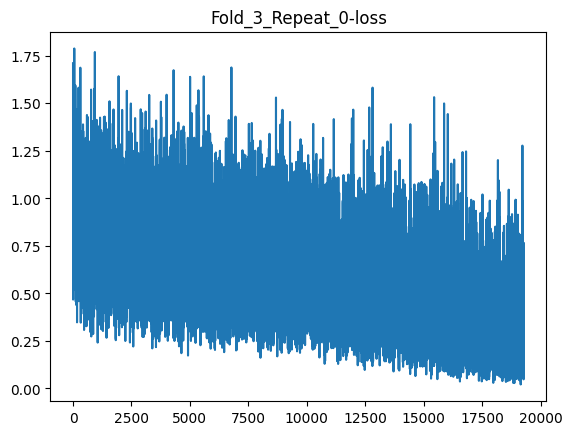

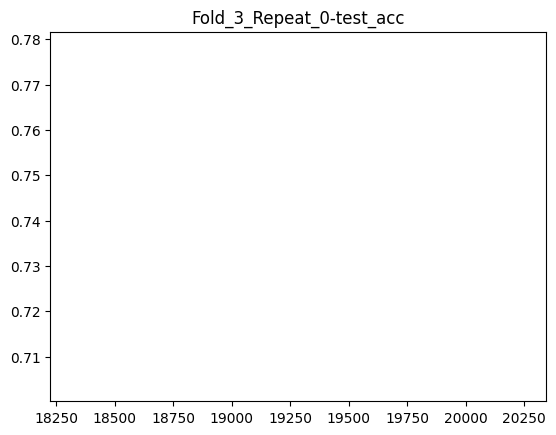

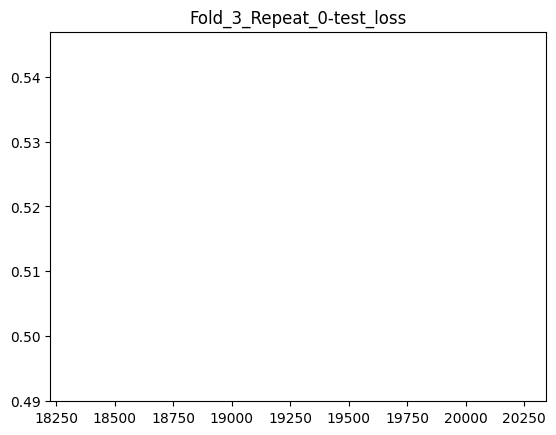

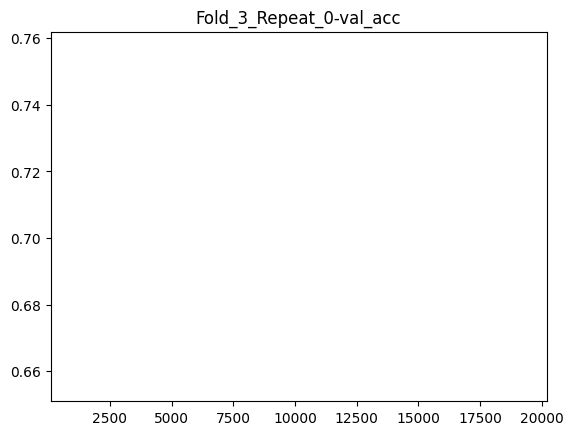

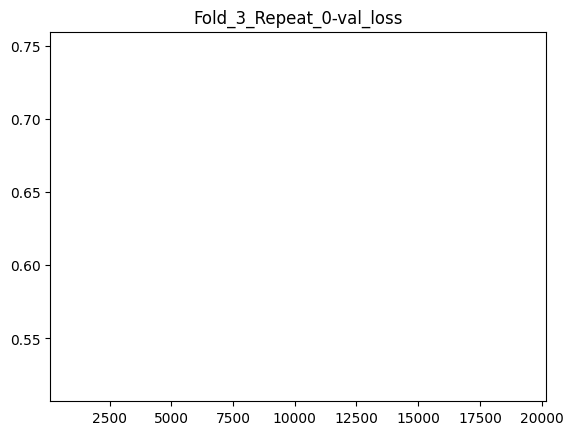

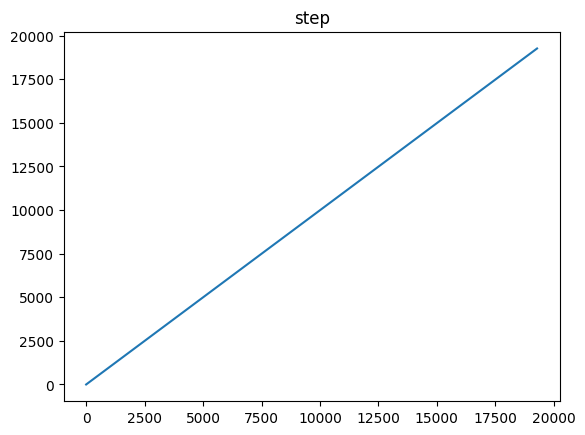

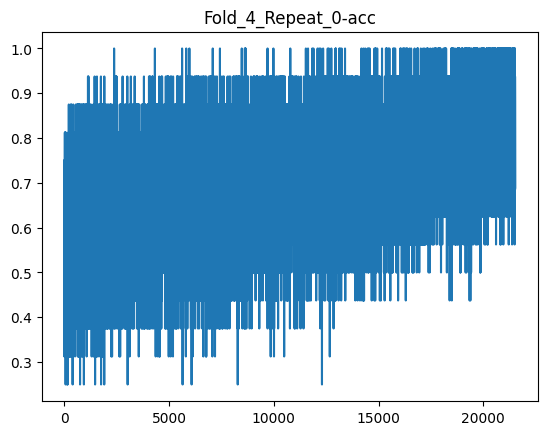

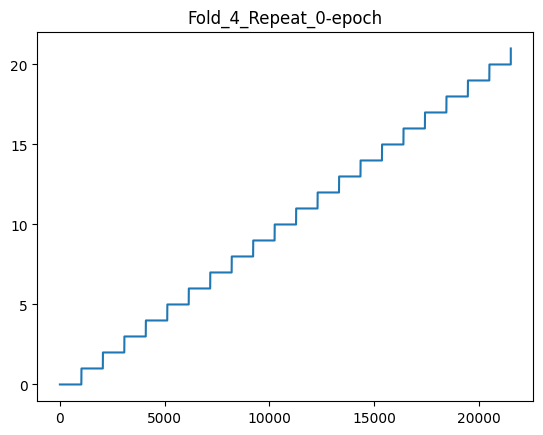

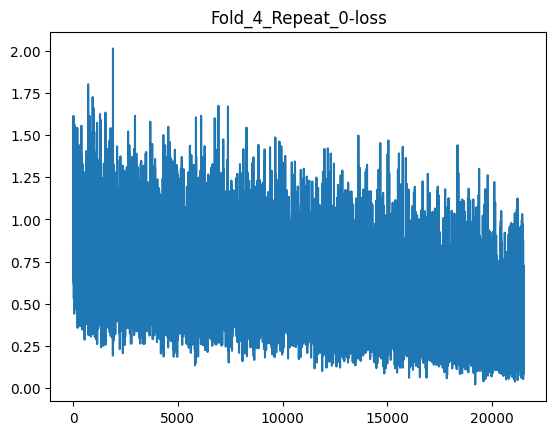

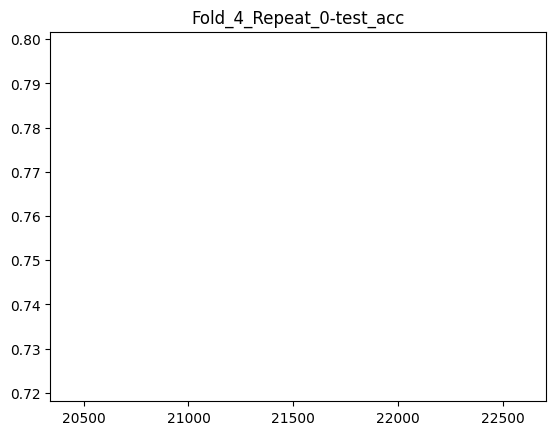

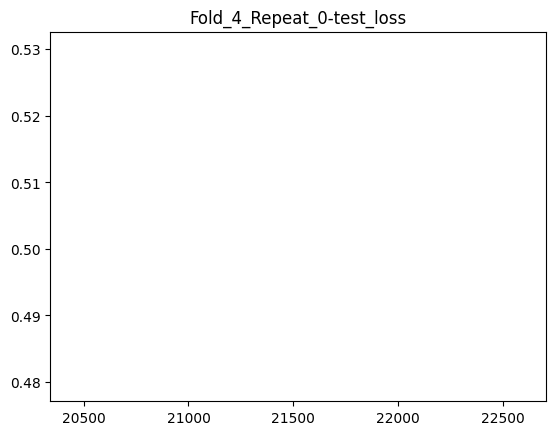

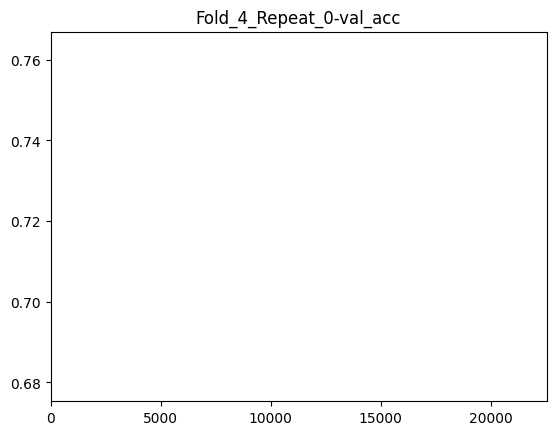

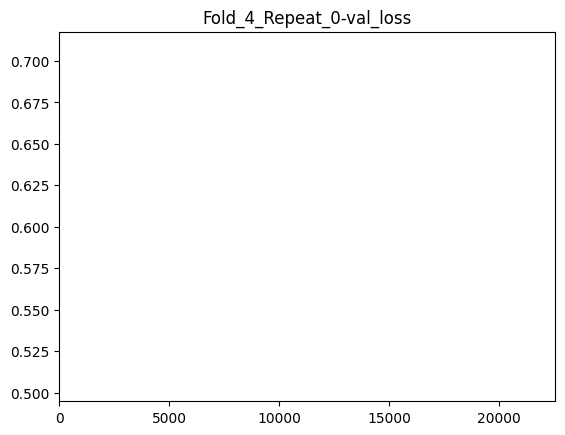

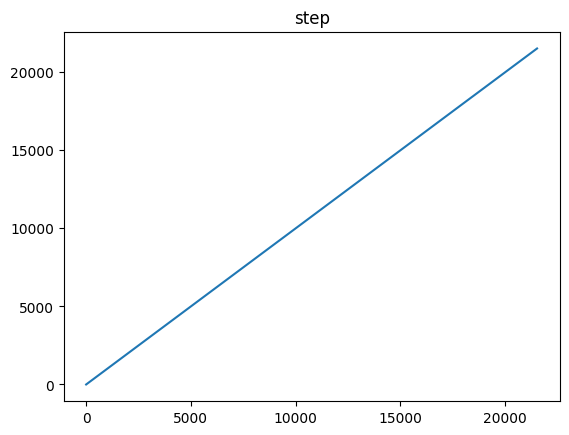

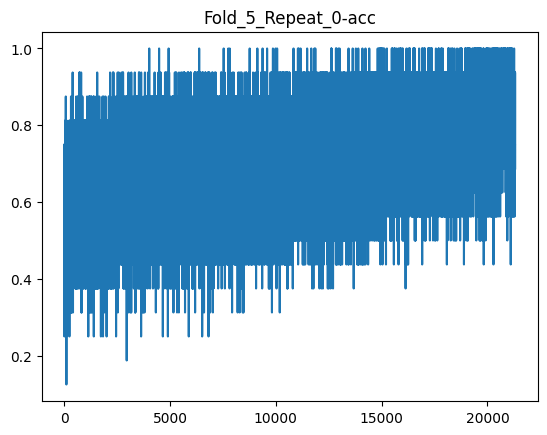

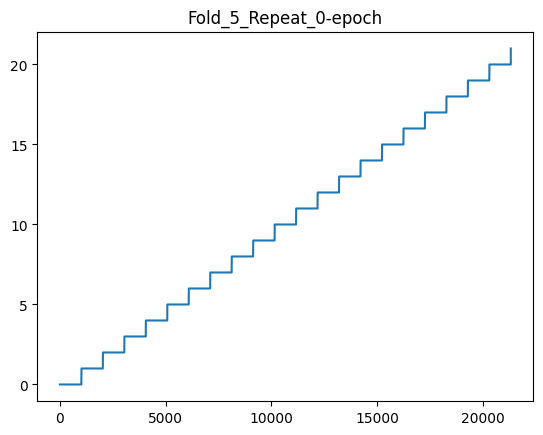

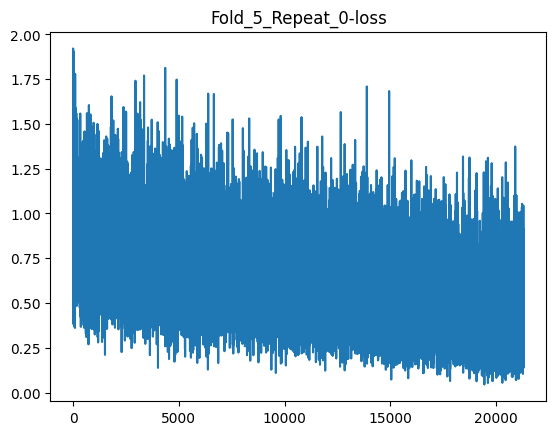

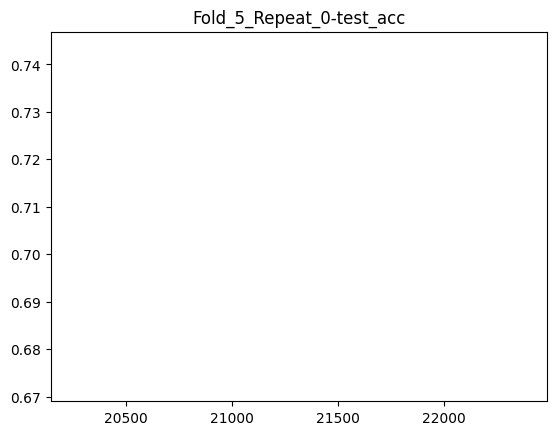

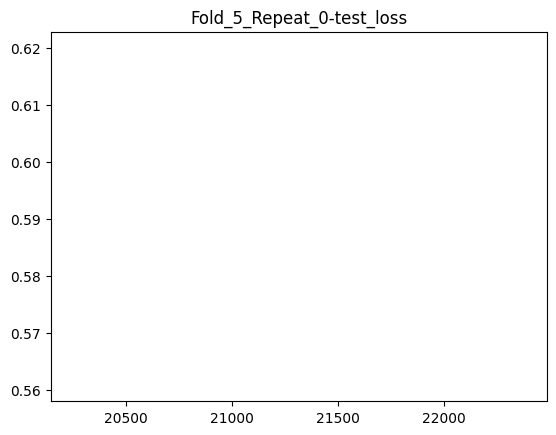

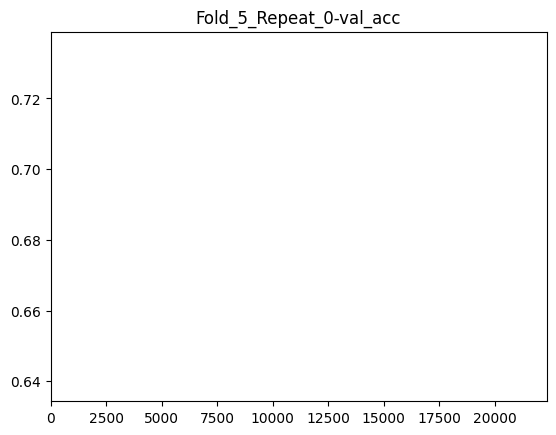

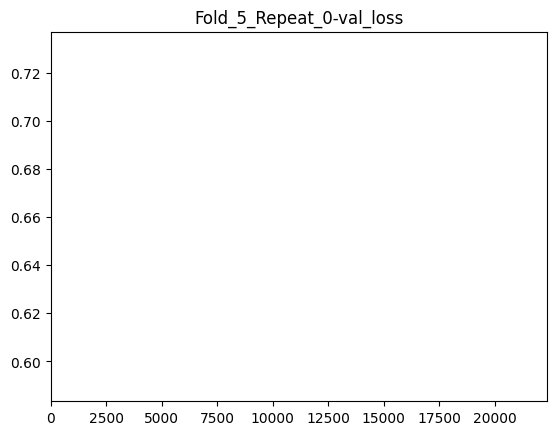

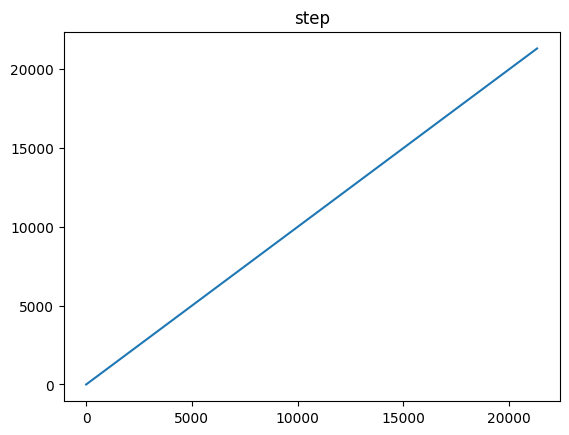

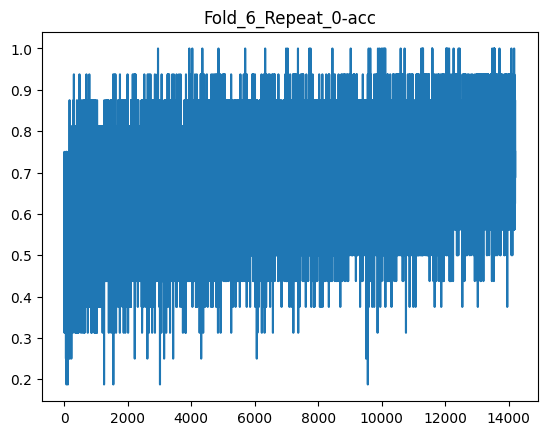

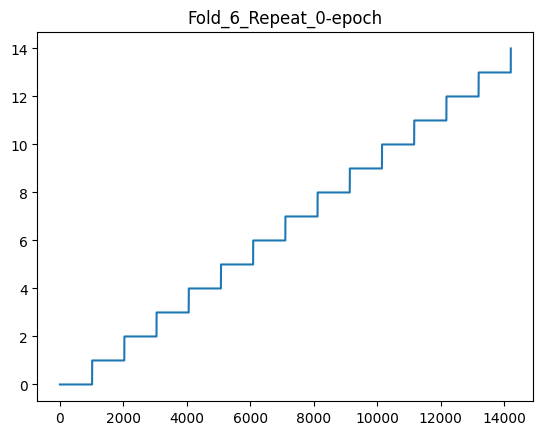

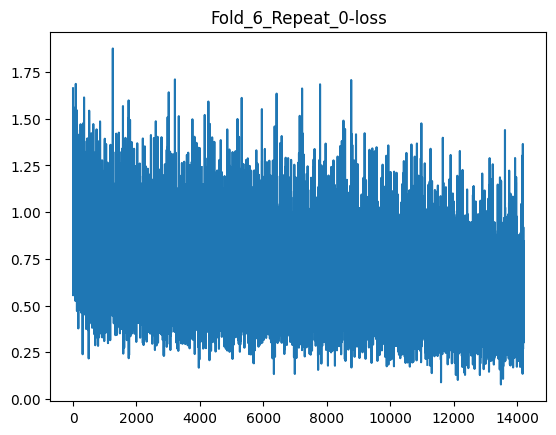

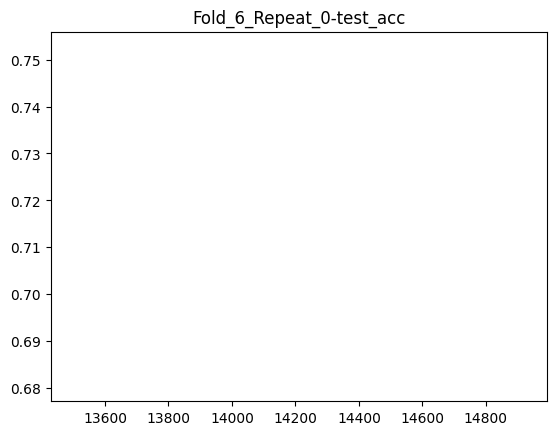

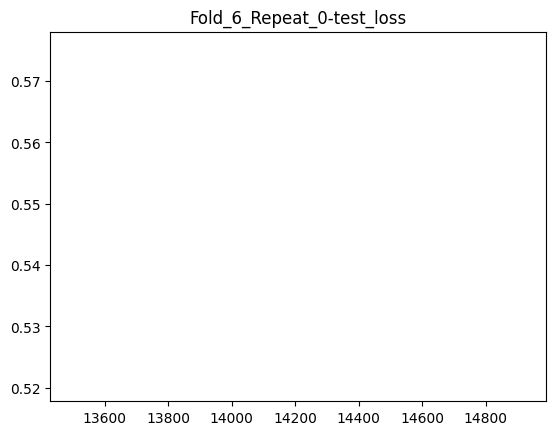

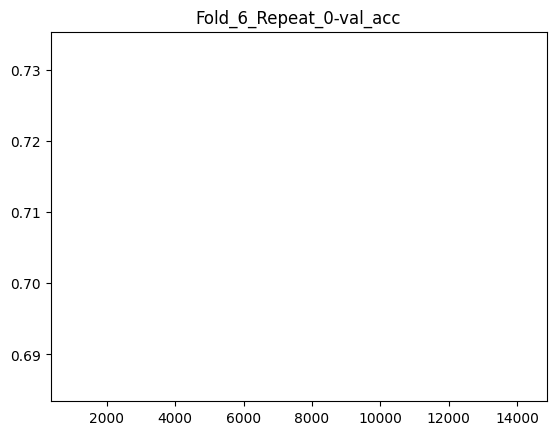

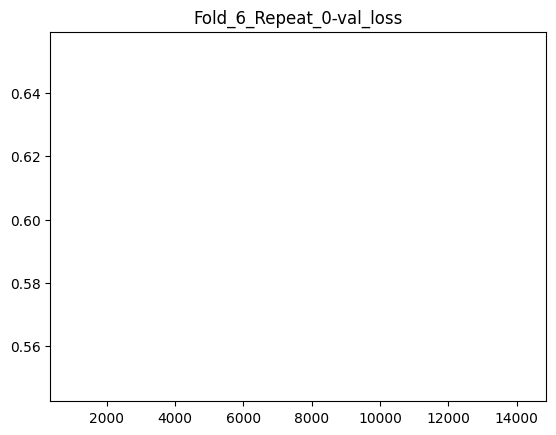

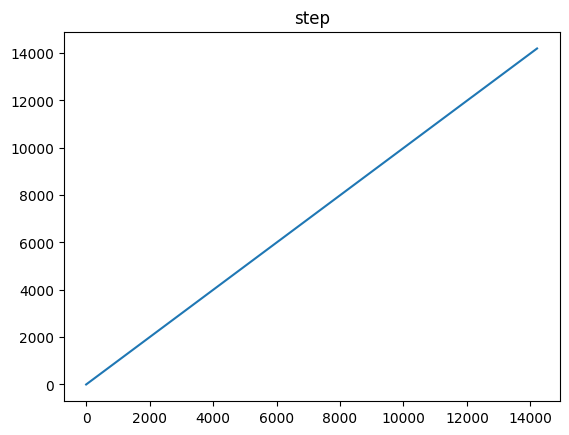

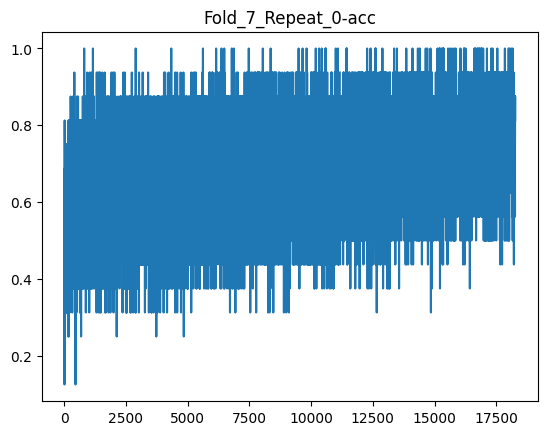

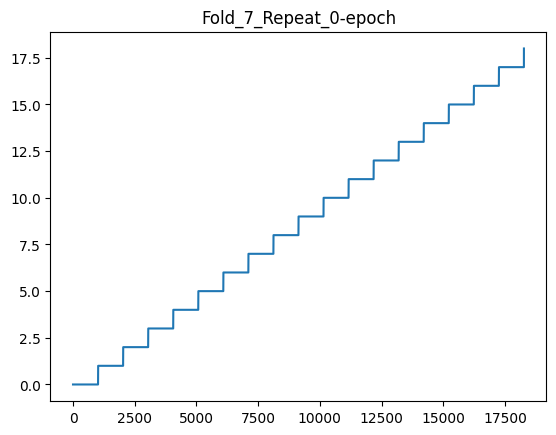

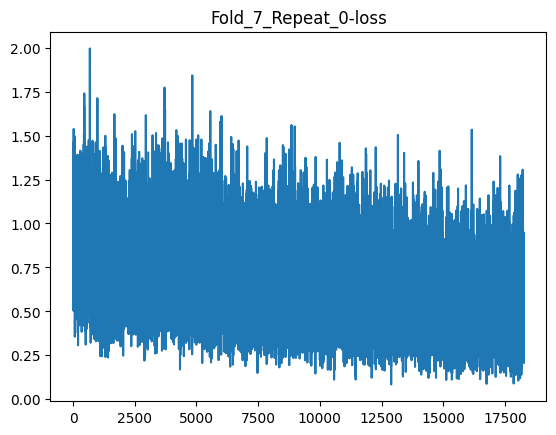

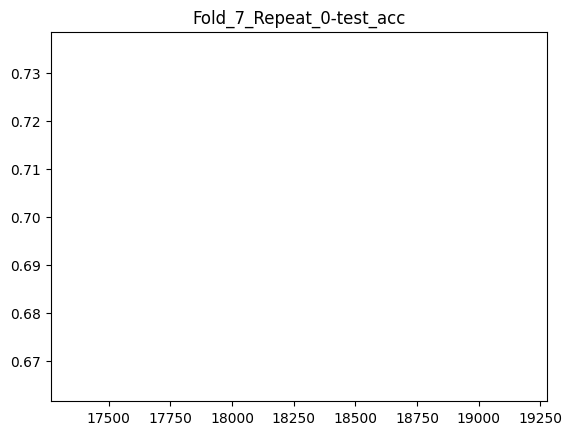

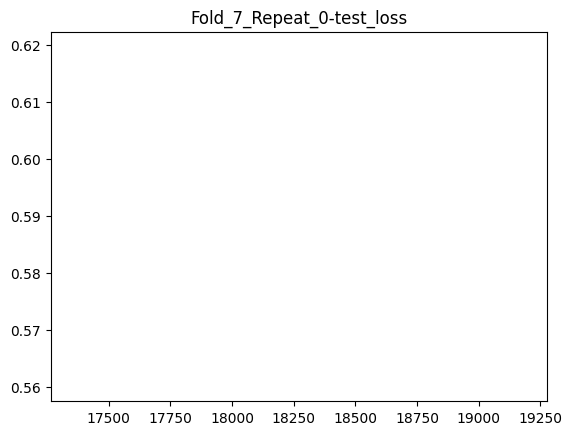

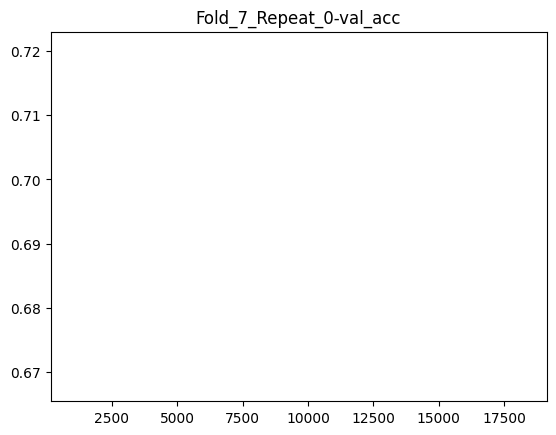

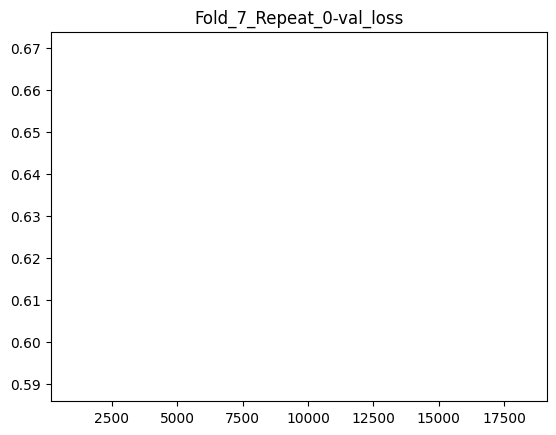

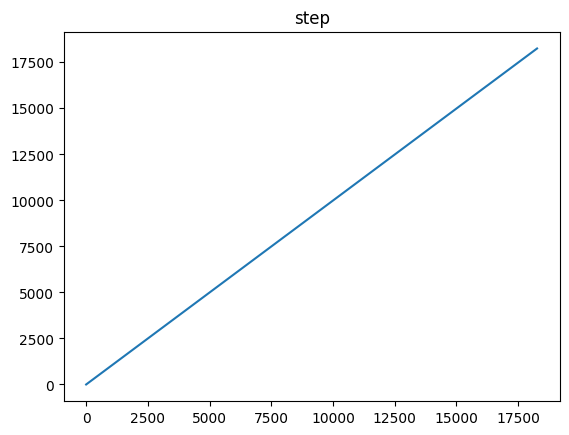

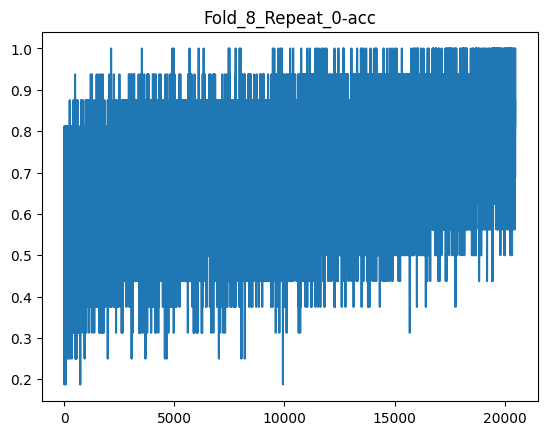

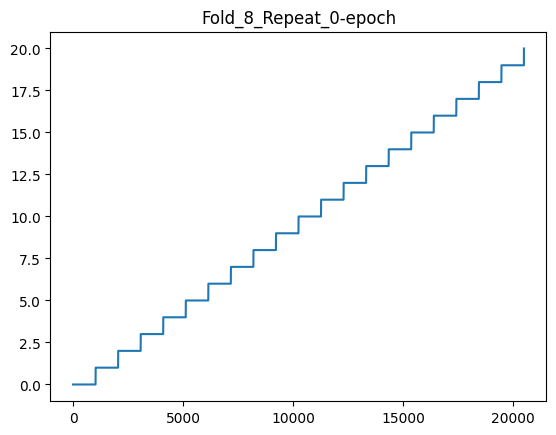

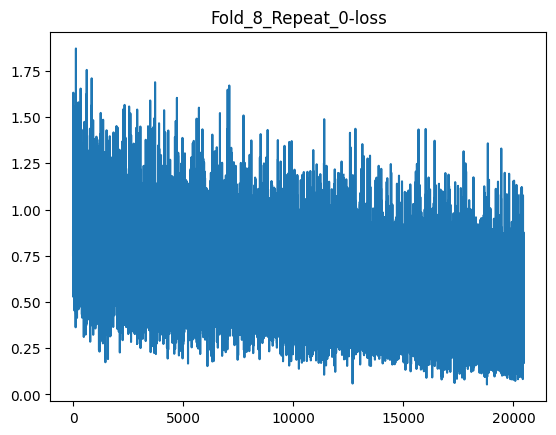

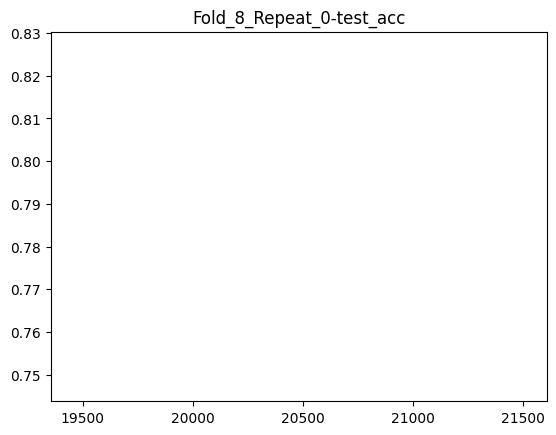

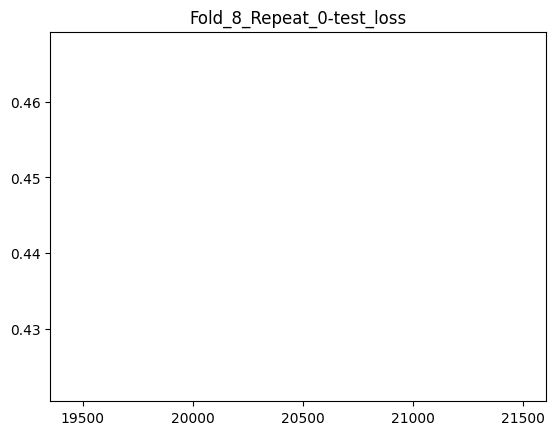

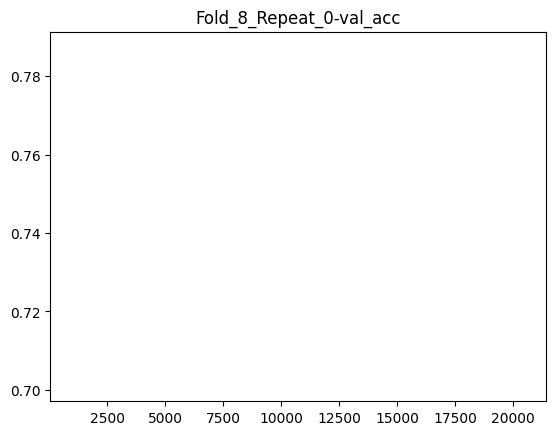

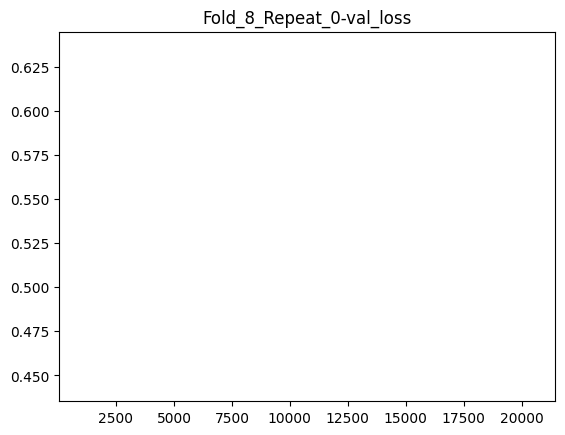

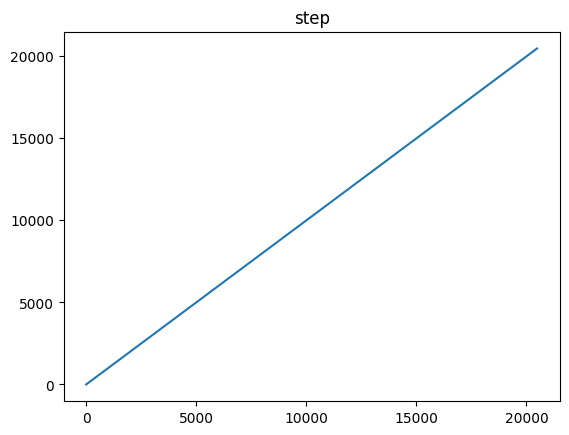

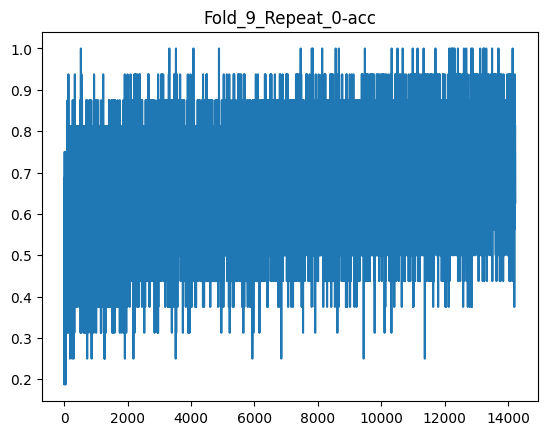

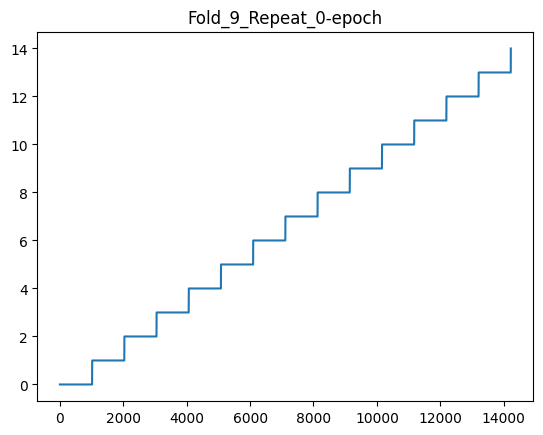

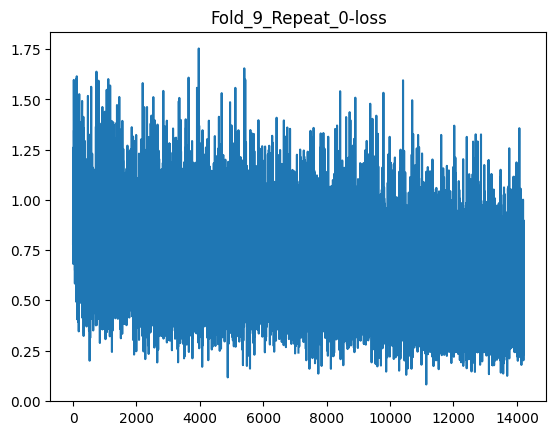

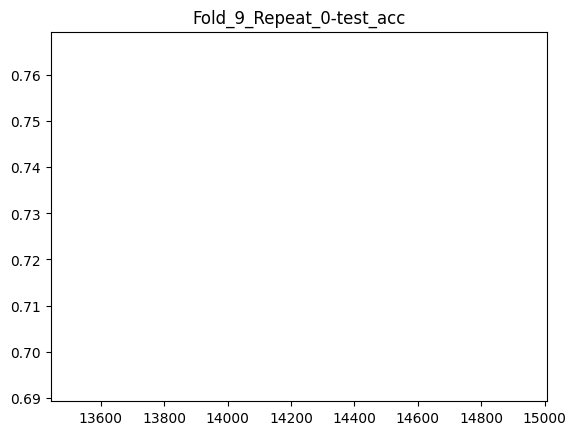

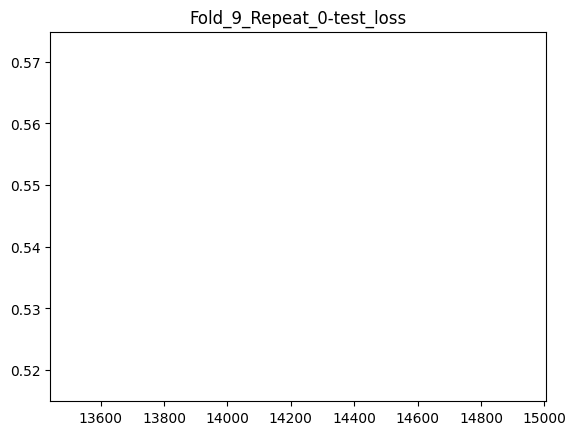

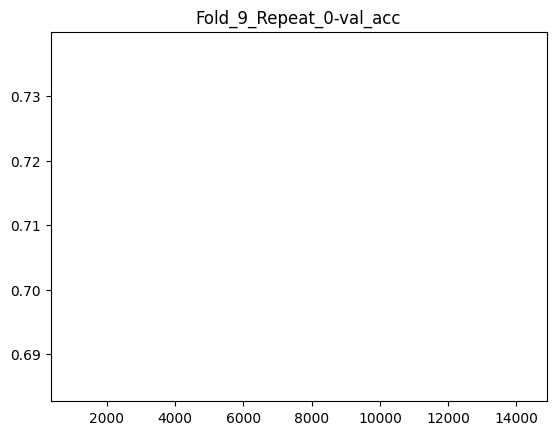

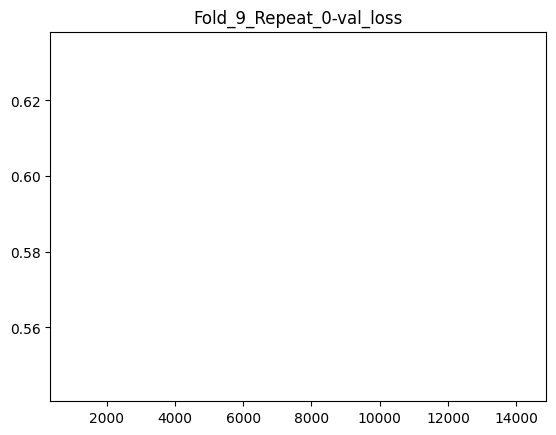

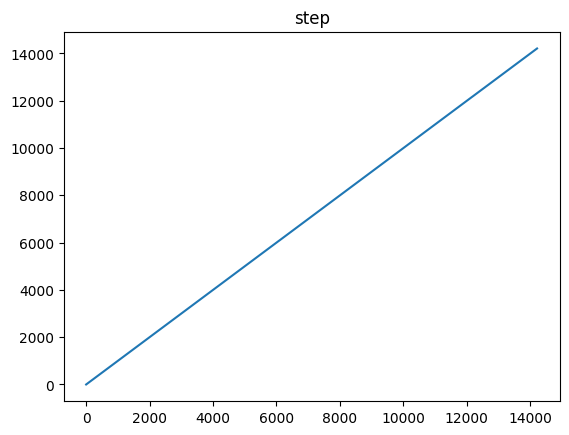

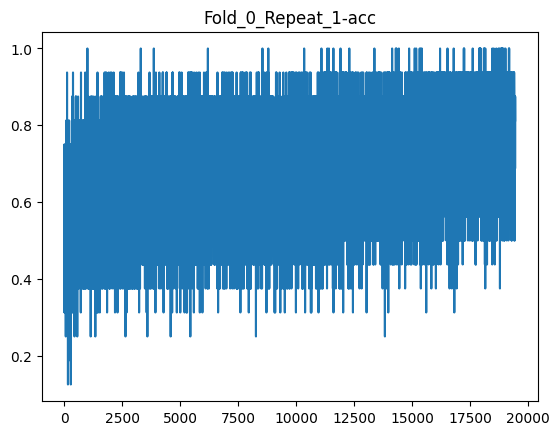

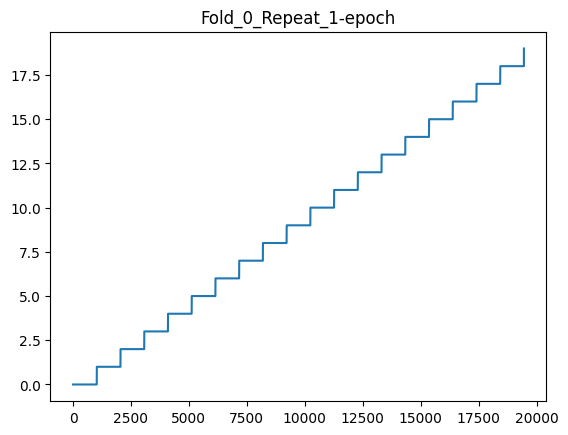

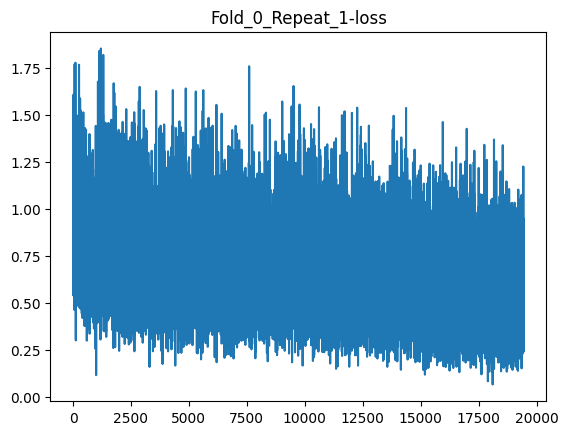

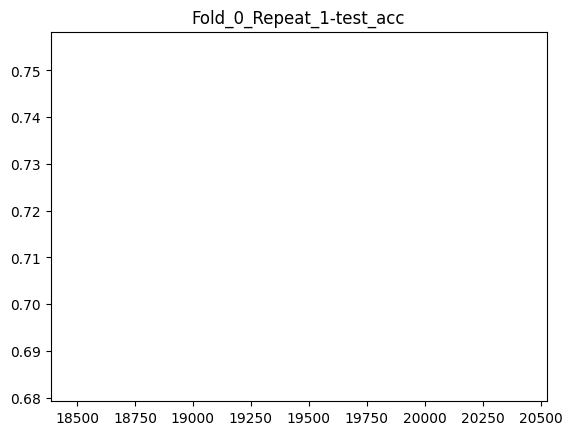

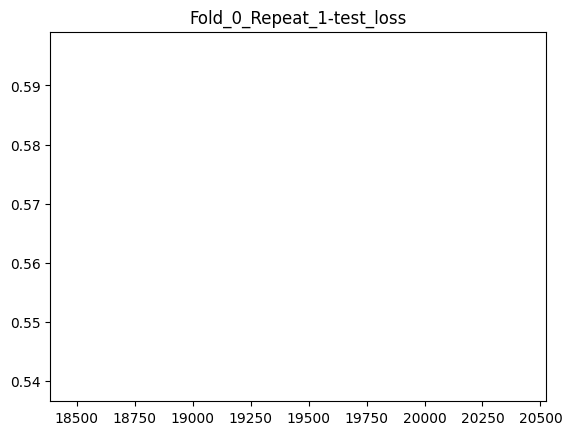

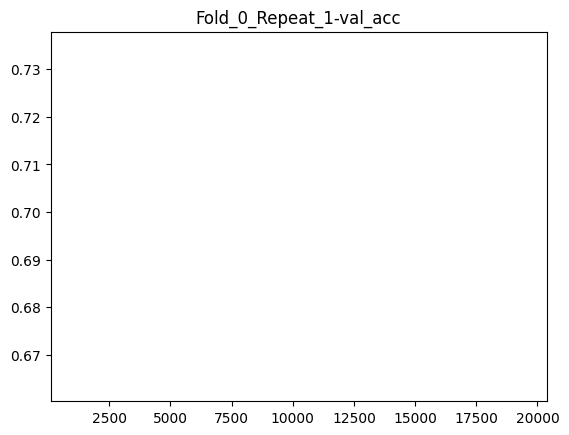

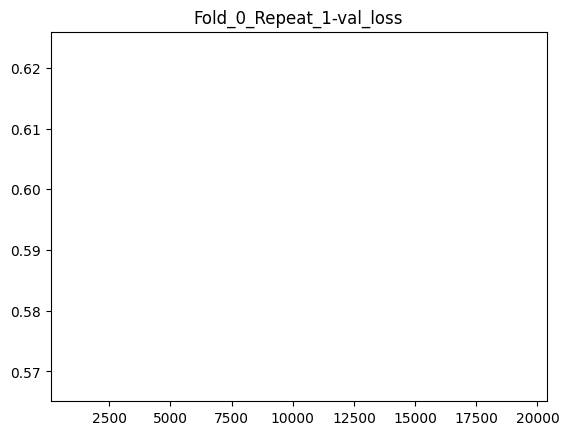

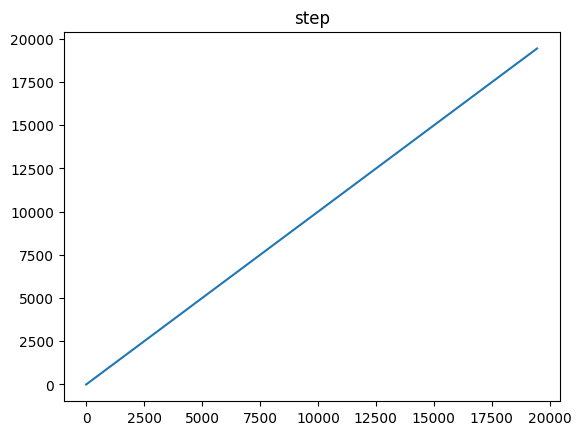

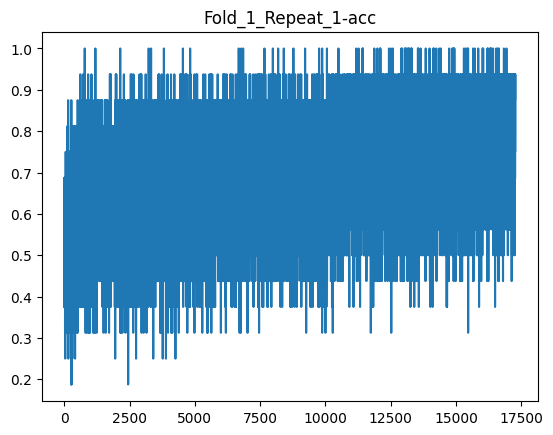

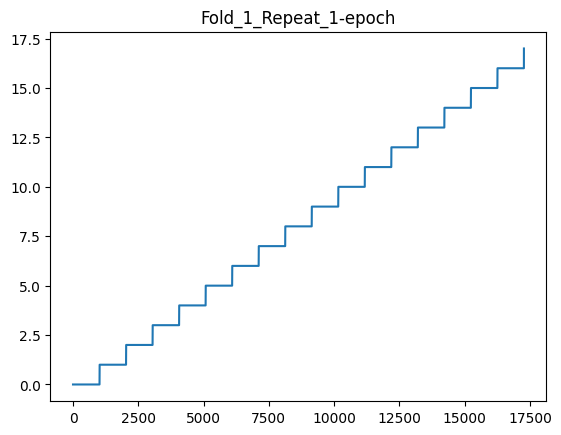

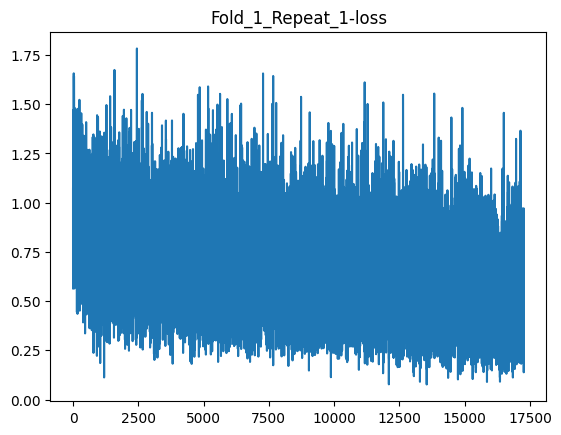

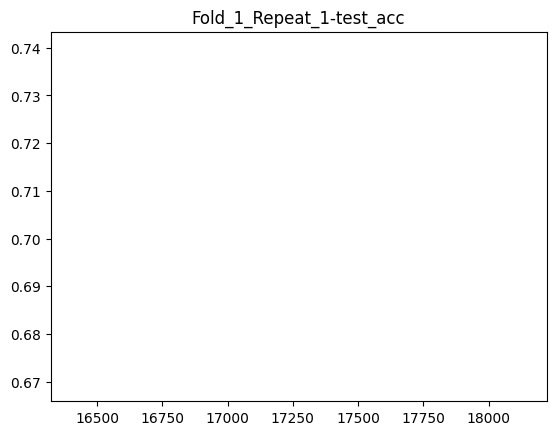

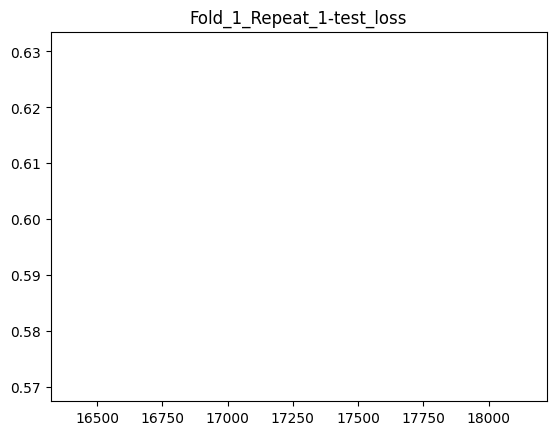

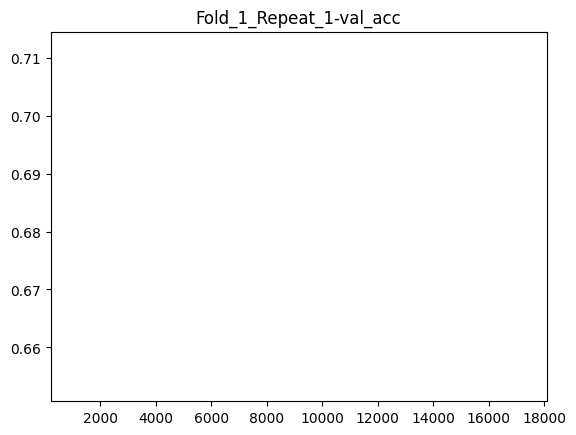

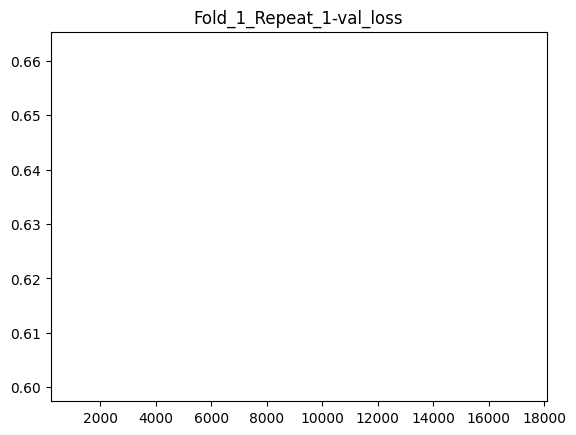

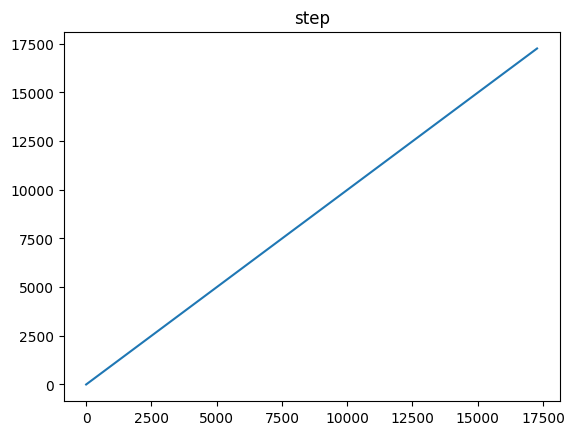

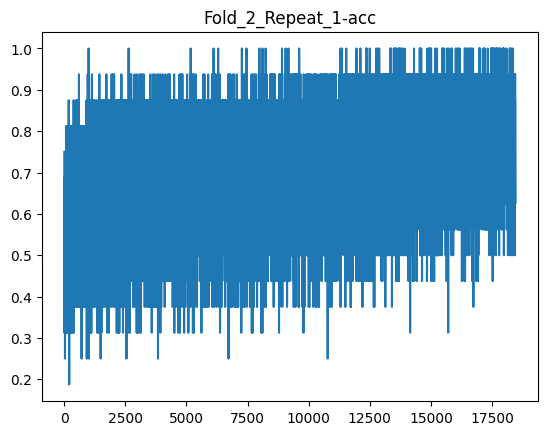

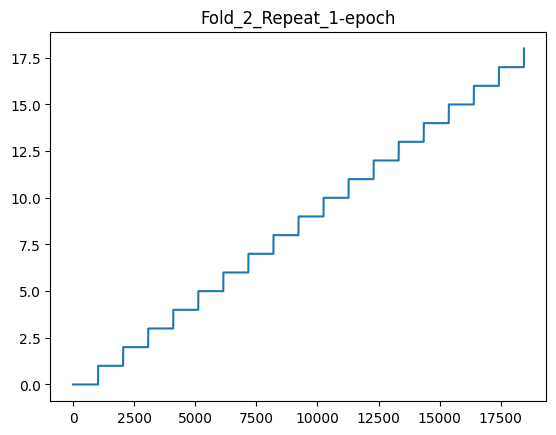

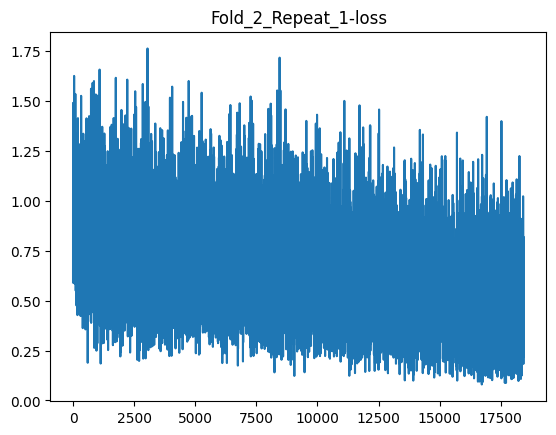

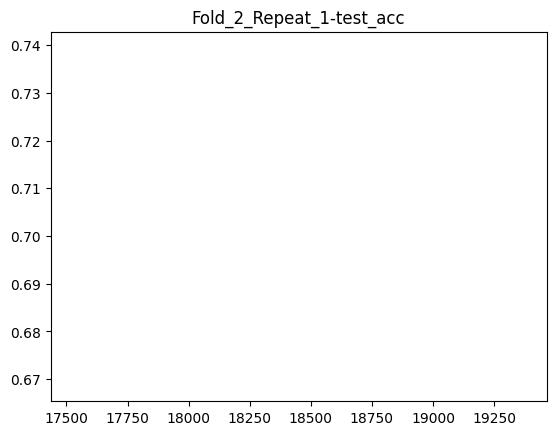

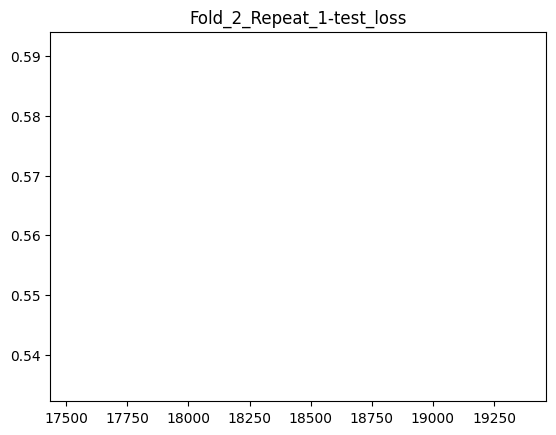

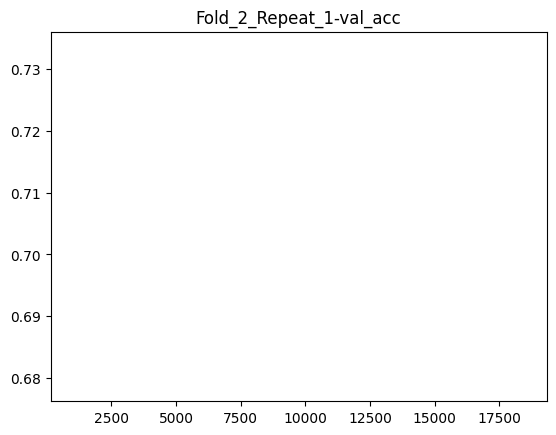

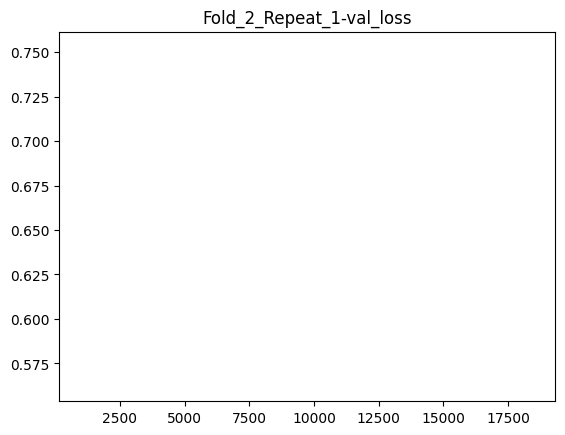

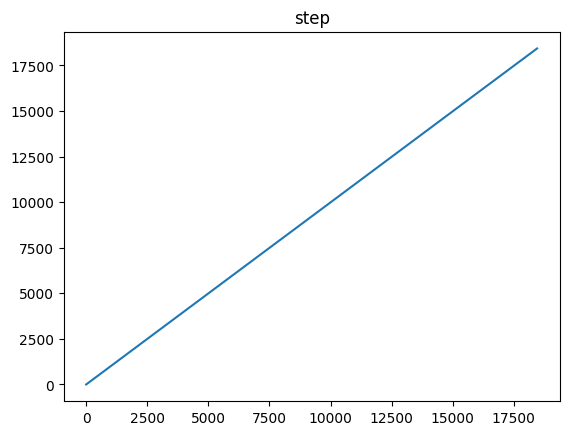

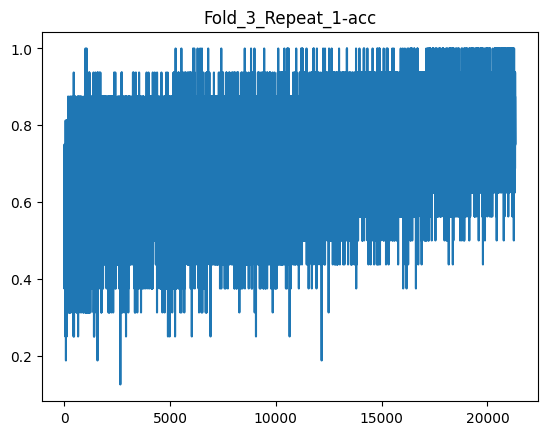

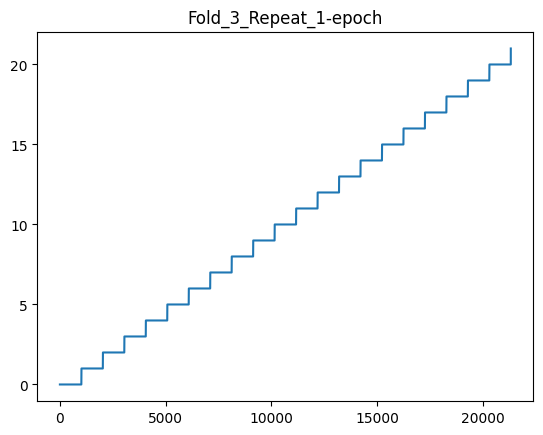

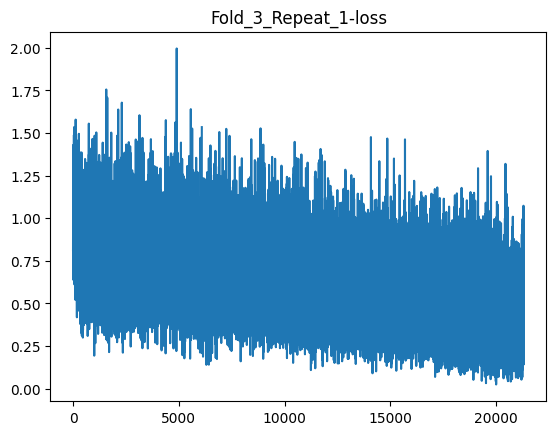

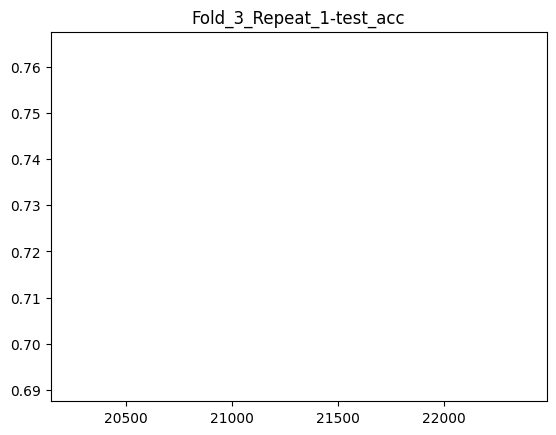

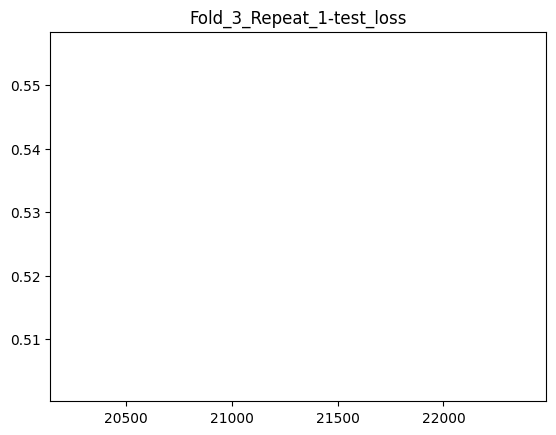

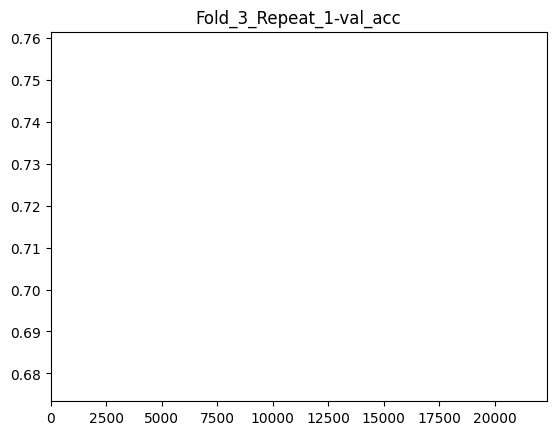

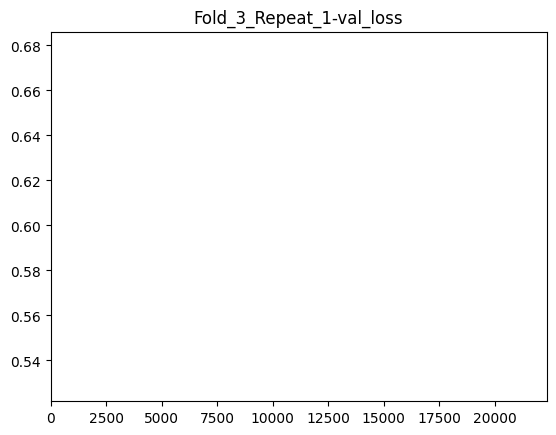

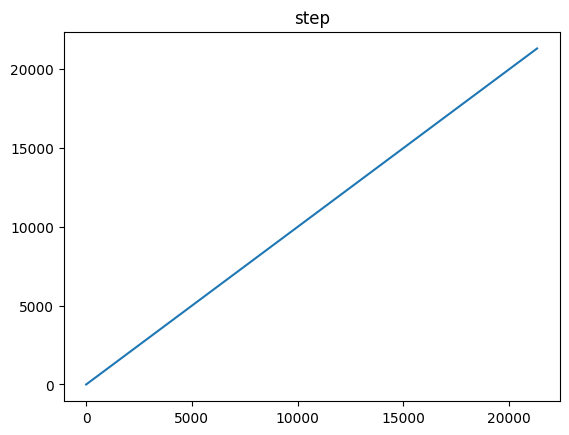

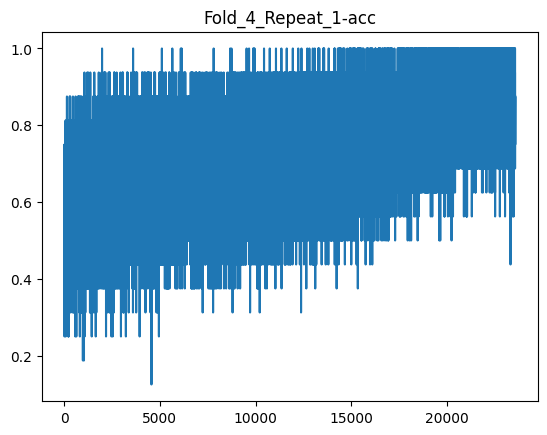

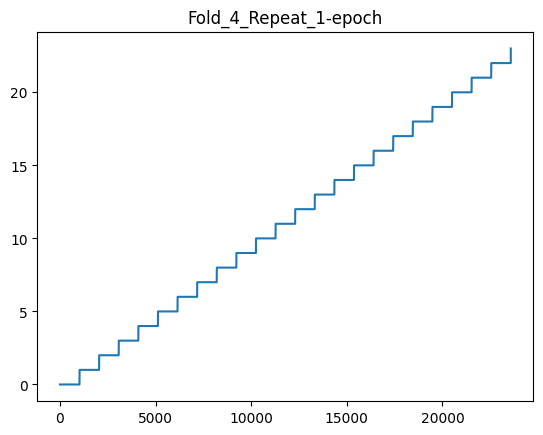

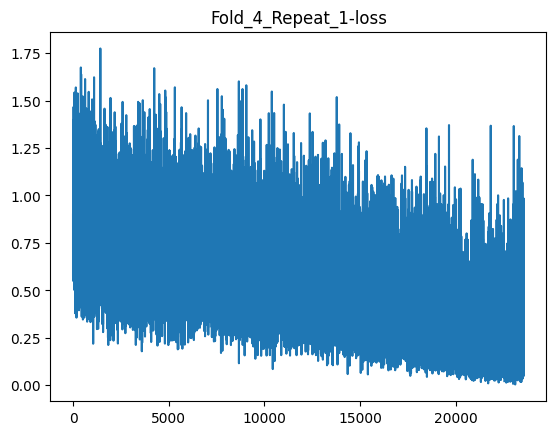

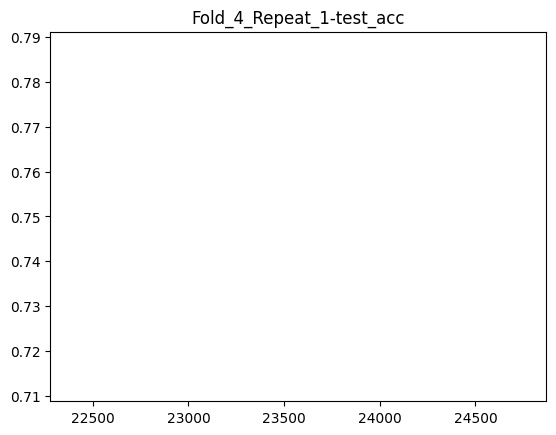

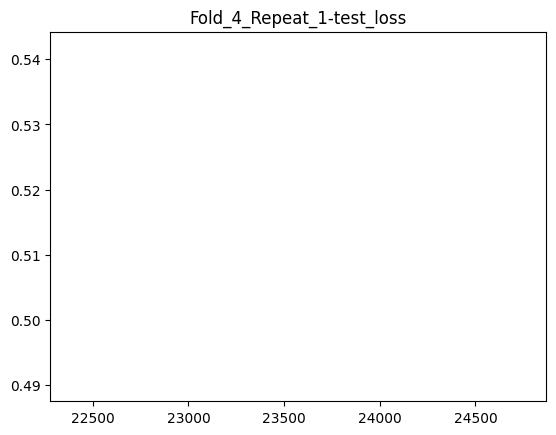

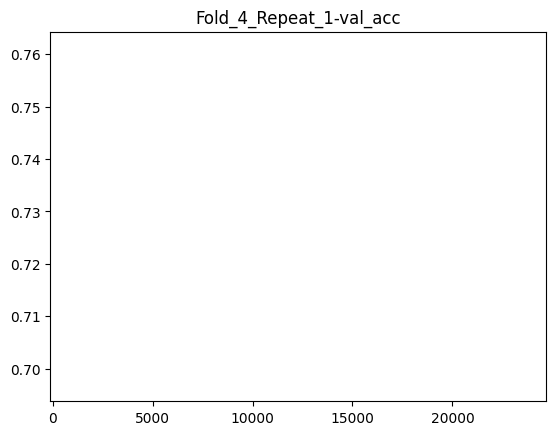

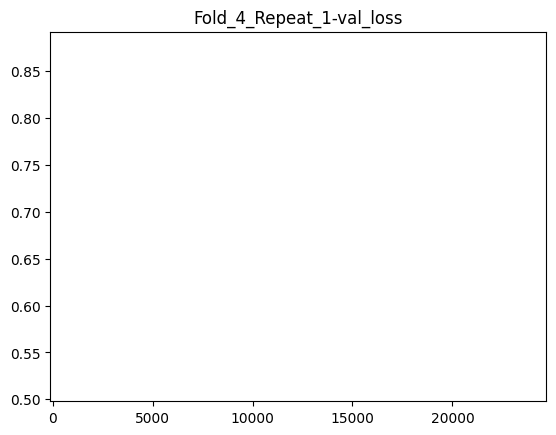

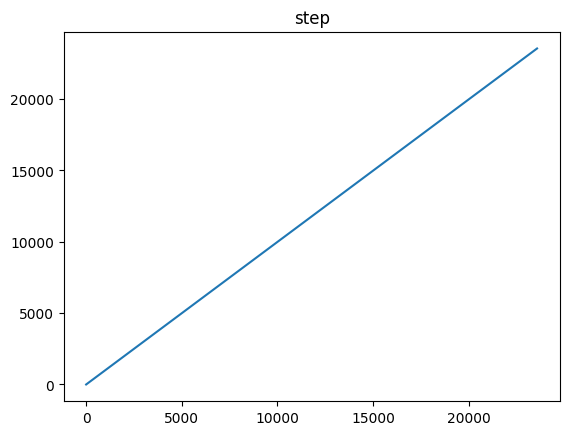

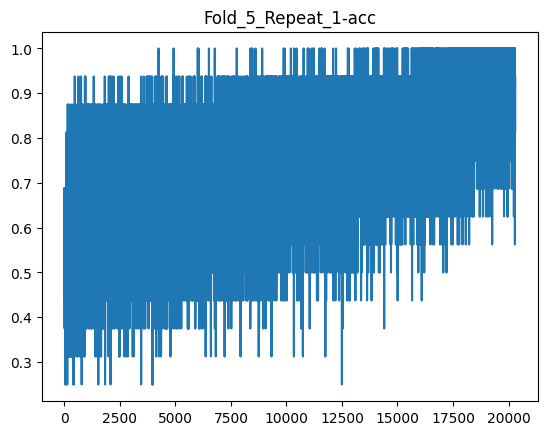

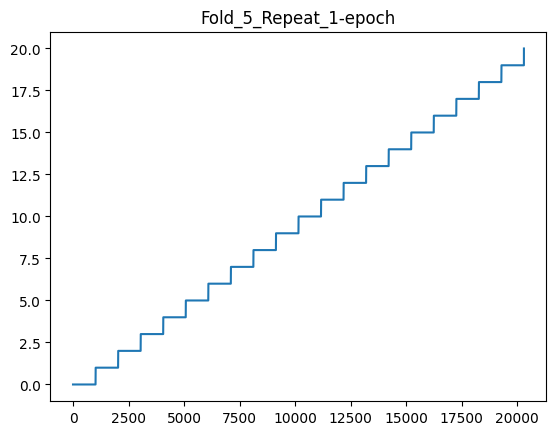

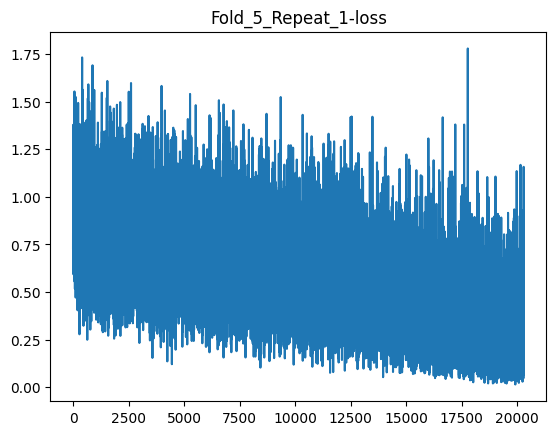

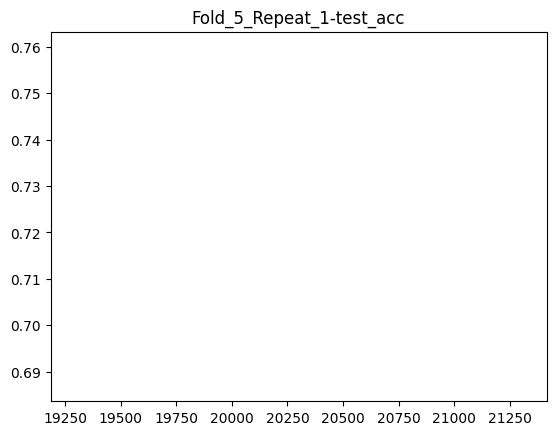

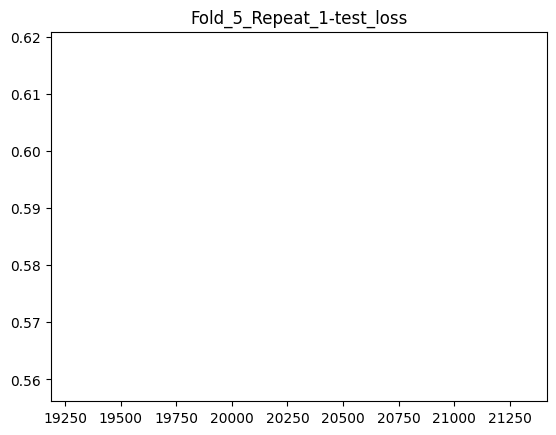

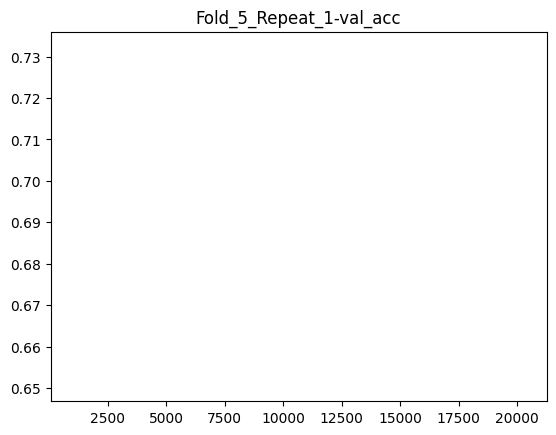

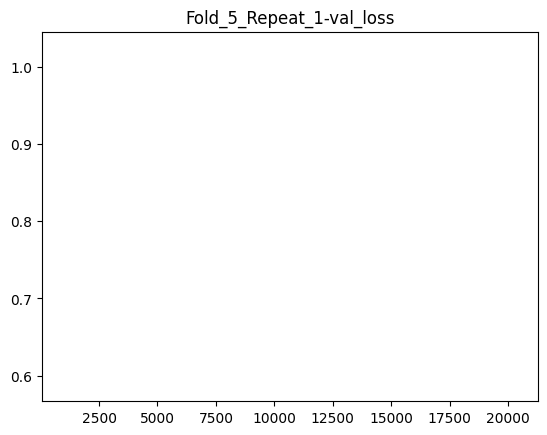

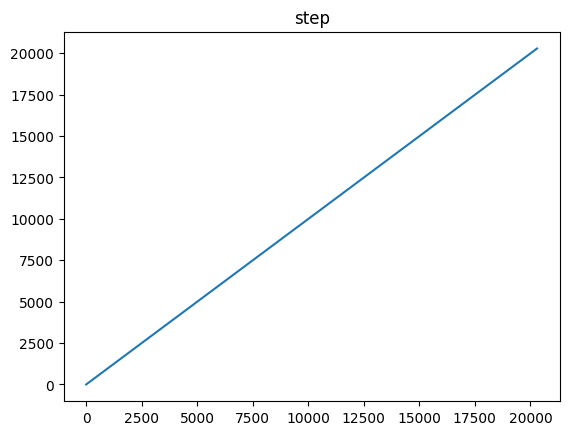

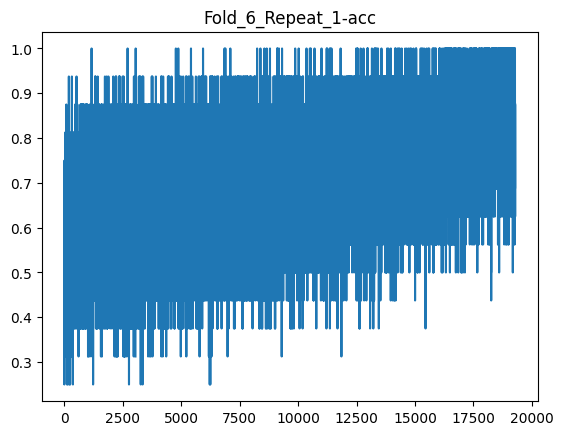

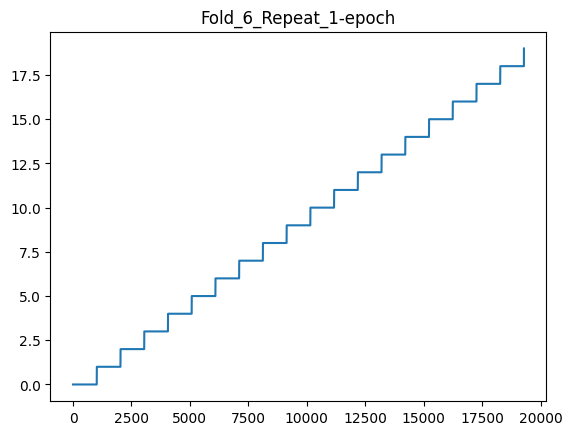

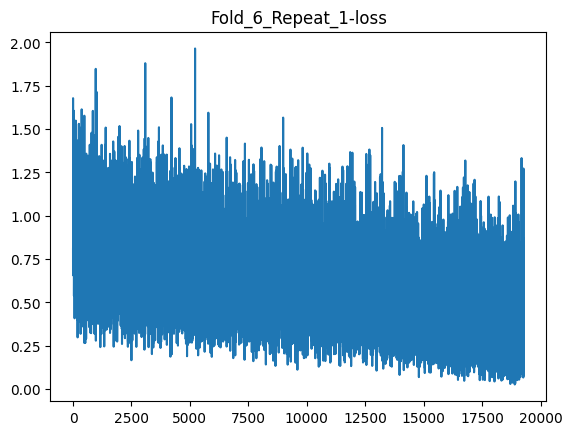

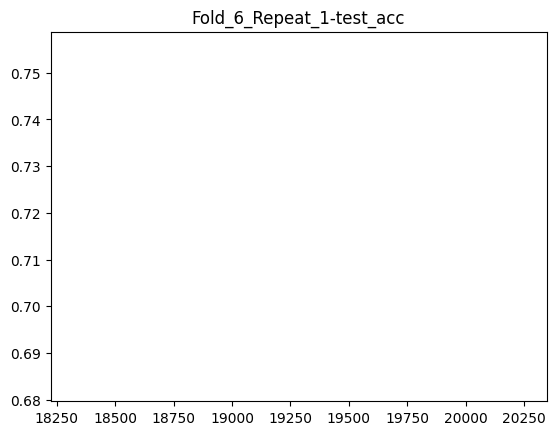

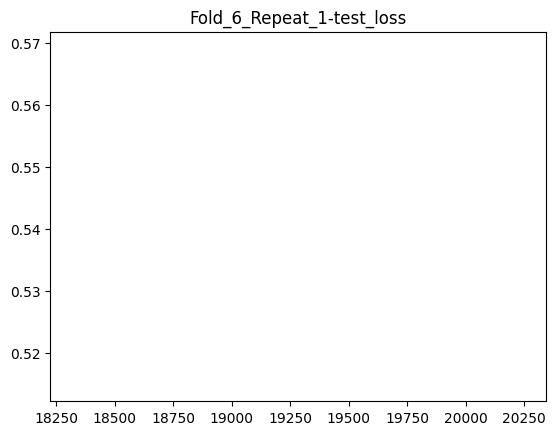

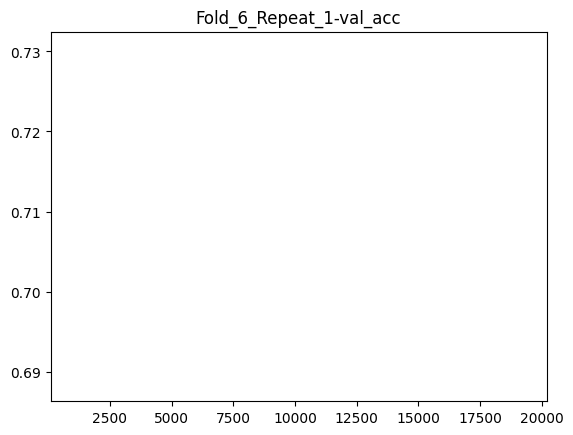

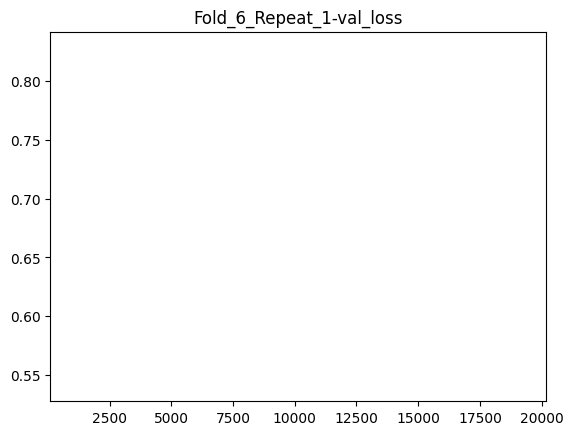

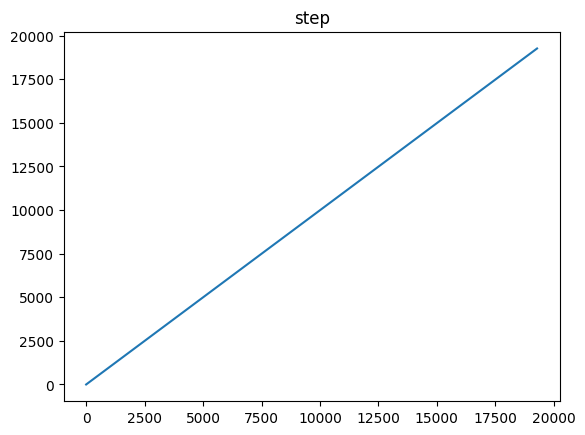

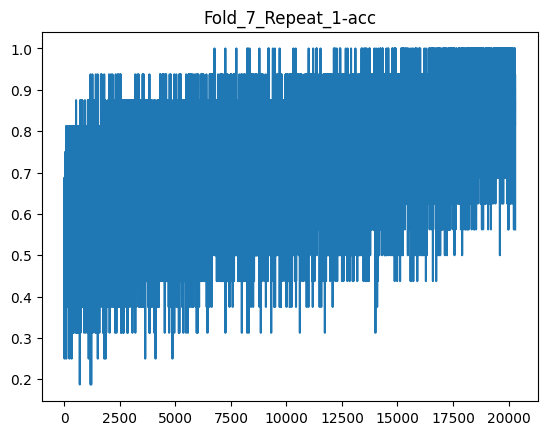

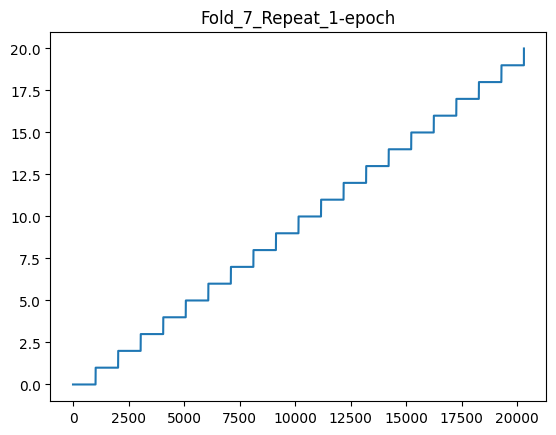

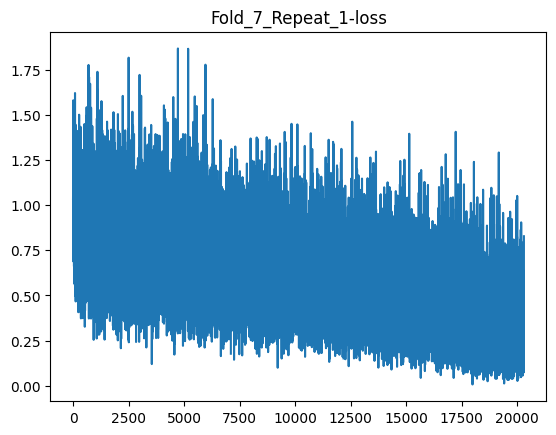

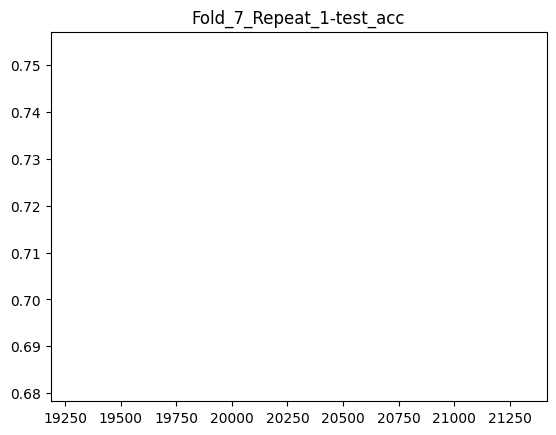

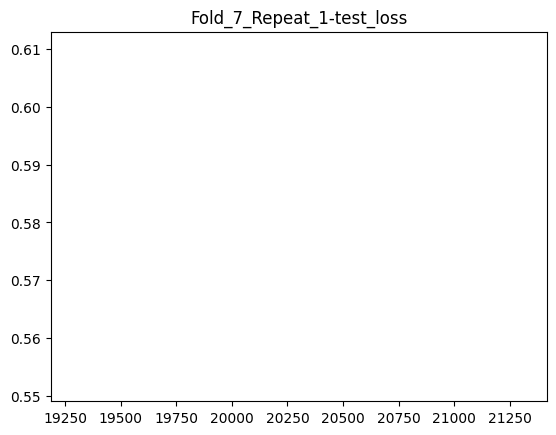

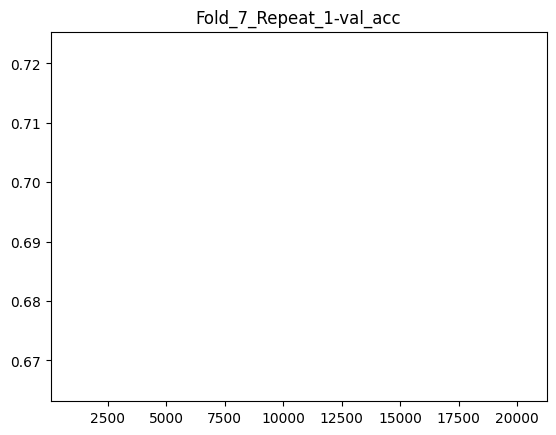

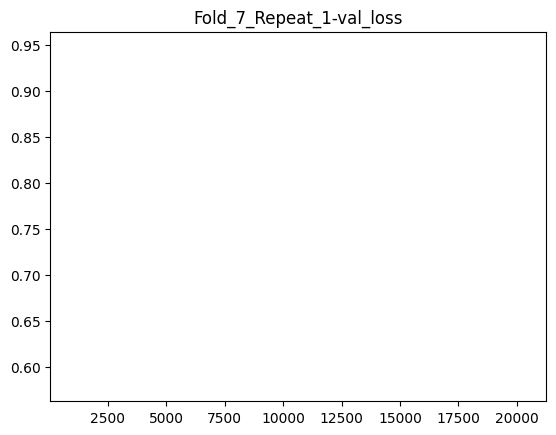

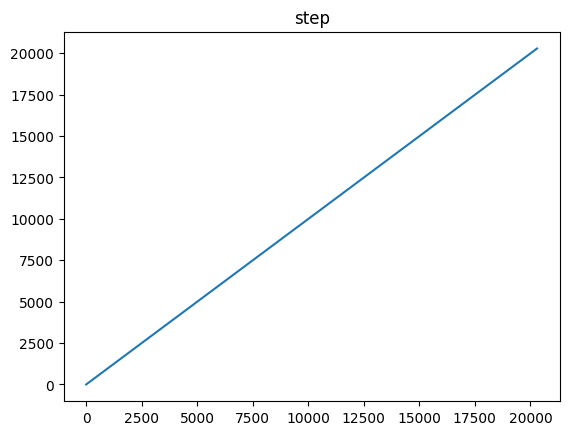

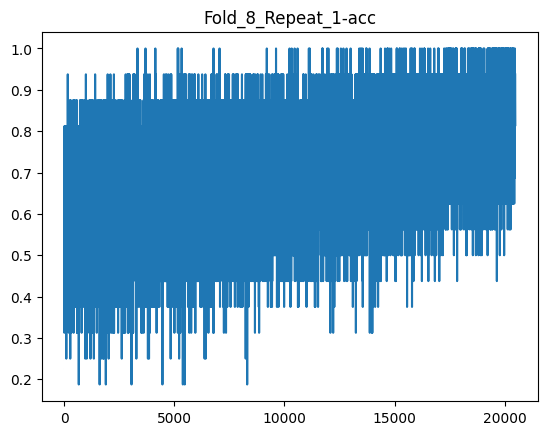

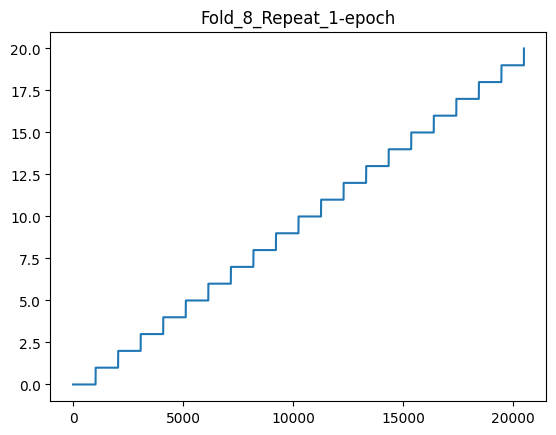

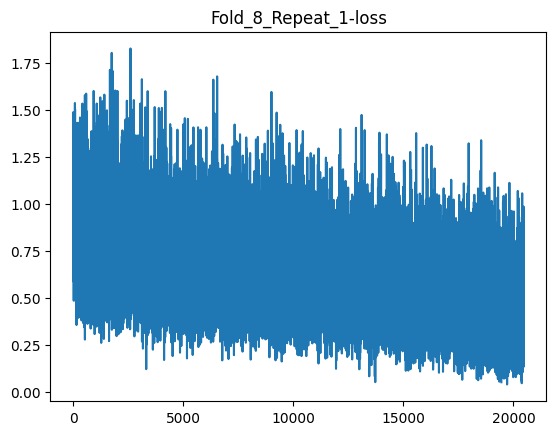

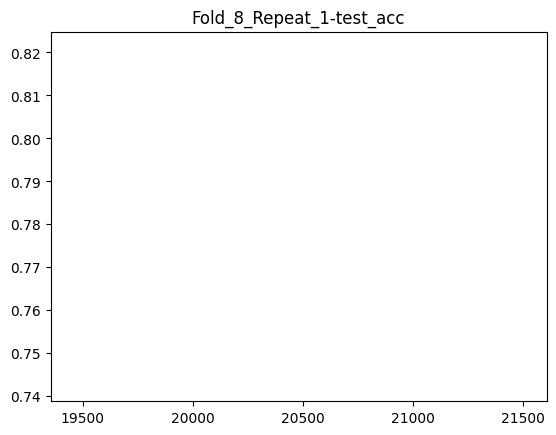

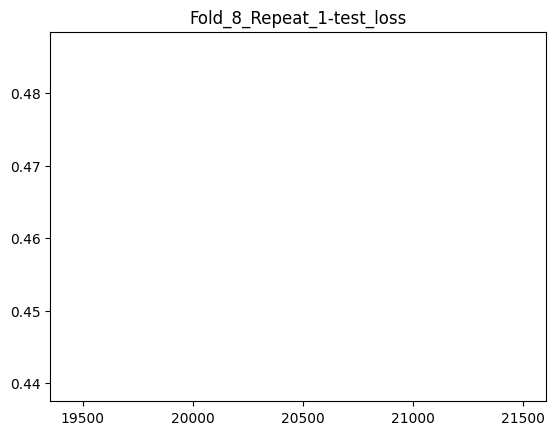

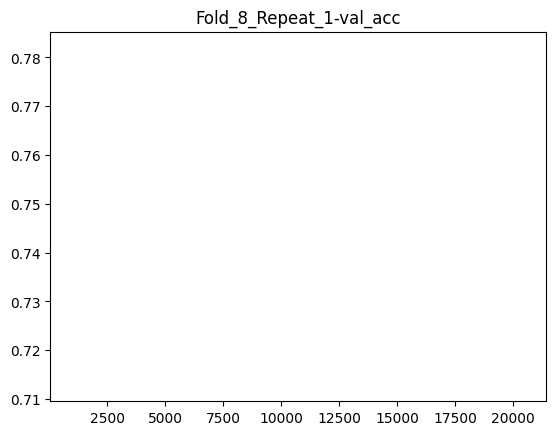

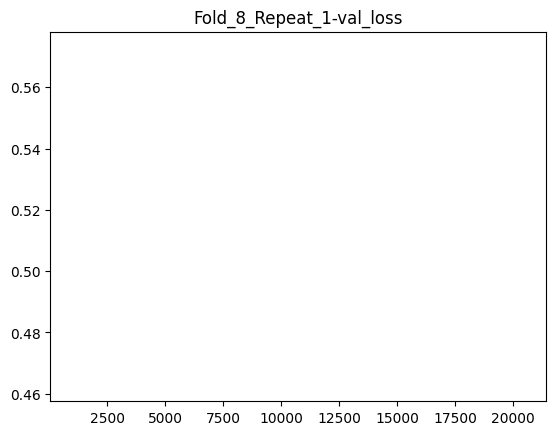

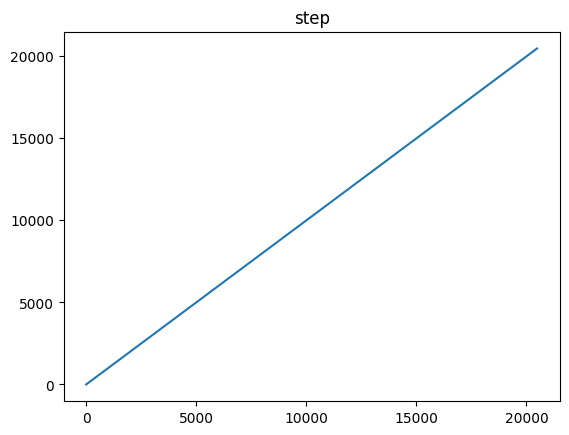

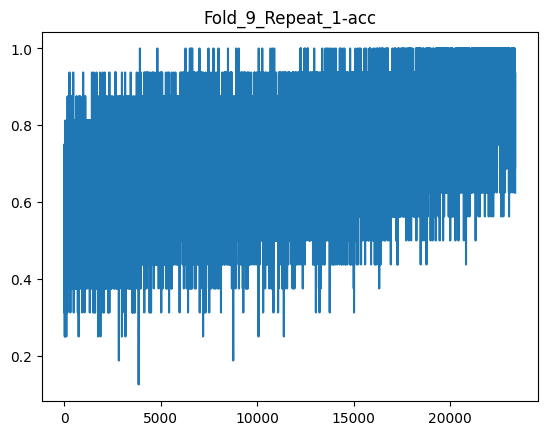

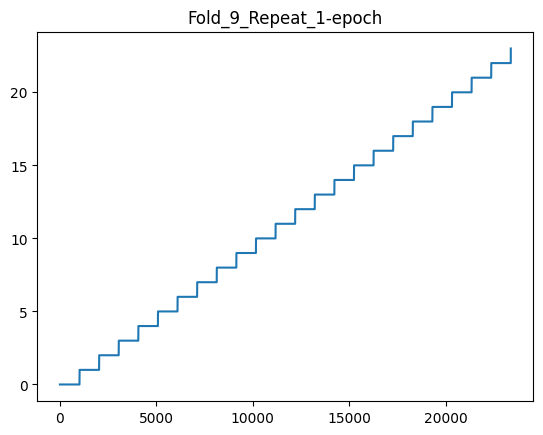

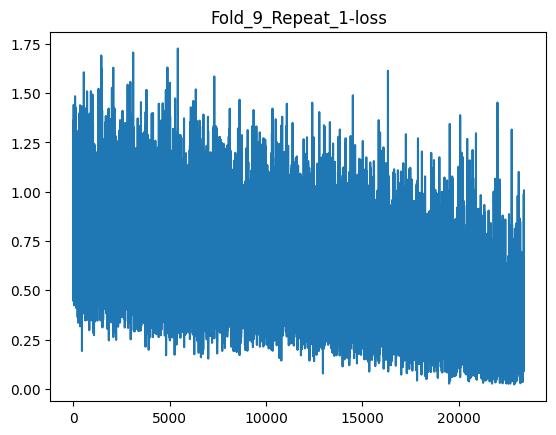

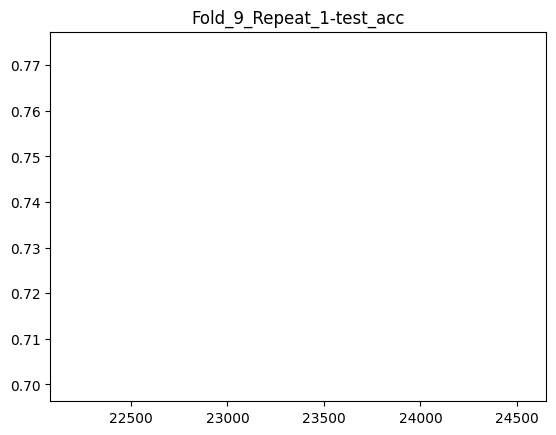

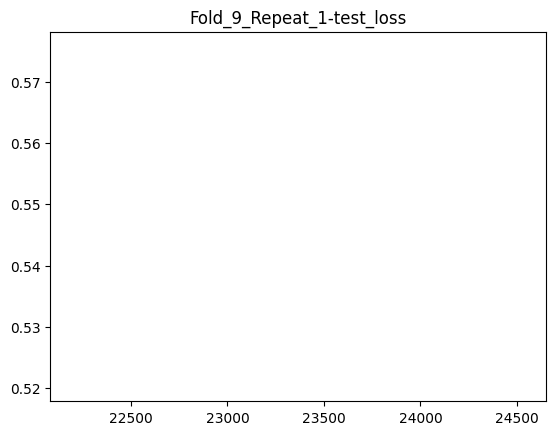

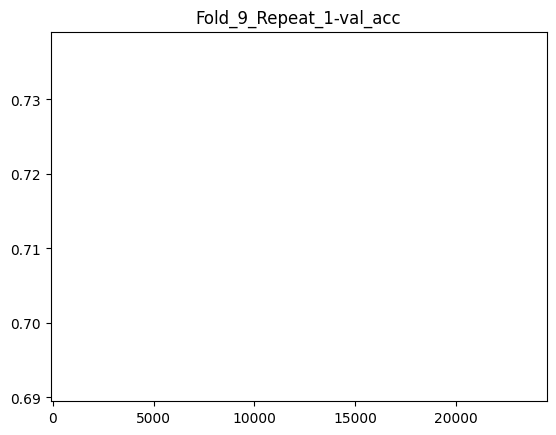

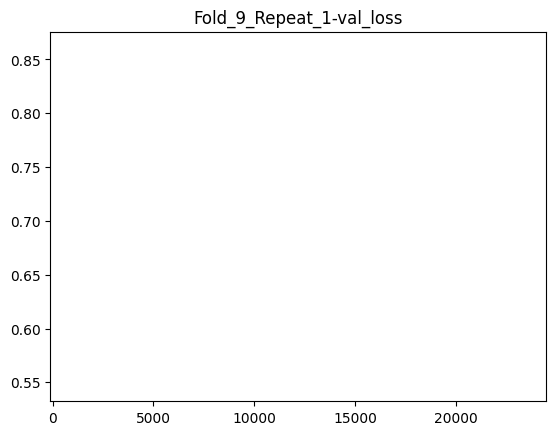

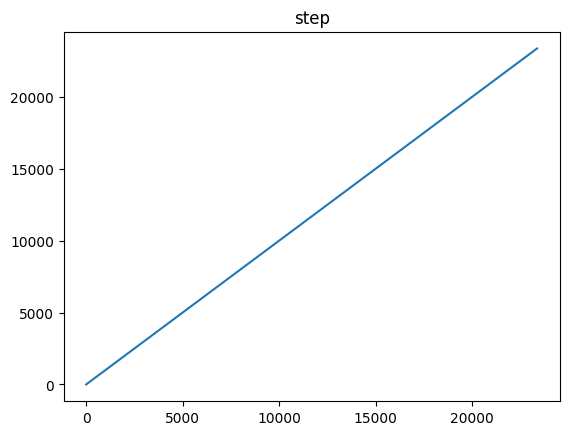

In [22]:
for i, df in enumerate(all_data):
    # plot all the columns in the dataframe separately
    for col in df.columns:
        df[col].plot(title=col)
        plt.show()